# Imports

In [1]:

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate

# Configs

In [2]:
LABELED_PATH = "/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/labels_phase2.parquet"
PREDICTED_XGB_PATH = "/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/XGB_predictions_phase2.parquet"
PREDICTED_XGB_RIDGE_PATH = "/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/XGB_ridge_predictions_phase2.parquet"
PREDICTED_REGRESSION_PATH = "/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/Ridge_predictions_phase2.parquet"
PREDICTED_SVR_RIDGE_PATH = '/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/SVR_ridge_predictions_phase2.parquet'
PREDICTED_RF_PATH = '/Users/maedeh/Desktop/demand_project/demand_project/shoofer-demand-prediction/data/RF_predictions_phase2.parquet'

SAVE_PLOT_PATH = '/Users/maedeh/Desktop/data/pngs/'


TEST_START_DATE = '2023-04-01'
LAST_WEEK_TEST_START_DATE = '2023-03-25'


HIGH_DEMAND_NUMS = 55
MID_DEMAND_NUMS = 157
sort_method = 'mean'


warnings.filterwarnings('ignore')

In [3]:
report_dict = {
    'high_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        }
        
    },
    'mid_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        }
        
    },    
    'low_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        }
        
    },
    'all_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_rf':None
        }
    },
    
    
}

In [4]:
predictions_dict = {
    'baseline_last_week':None,
    'model_regression':None,
    'model_xgboost':None,
    'model_rf':None
}

In [5]:
sorted_locations_dict={
    'sorted_index':None,
}

In [6]:
predictions_mean_error_dict={
    
    'baseline_last_week':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Hour_interval':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_regression':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Hour_interval':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_xgboost':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Hour_interval':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_rf':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Hour_interval':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
}

# Load Data

## Load labeled data

In [7]:
labeled_df = pd.read_parquet(LABELED_PATH)
print(labeled_df.shape)
labeled_df.head()

(251520, 4)


Location       Date  Hour_interval  Demand
0         1 2023-01-01              0     0.0
1         1 2023-01-01              3     1.0
2         1 2023-01-01              6     1.0
3         1 2023-01-01              9     1.0
4         1 2023-01-01             12    13.0

In [8]:
test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE]
test_df = test_df.reset_index(drop = True)
print(test_df.shape)
test_df.head()

(62880, 4)


Location       Date  Hour_interval  Demand
0         1 2023-04-01              0     0.0
1         1 2023-04-01              3     1.0
2         1 2023-04-01              6     1.0
3         1 2023-04-01              9     0.0
4         1 2023-04-01             12     1.0

## Load Predicted Data

In [9]:
predictions_dict['model_xgboost'] = pd.read_parquet(PREDICTED_XGB_PATH)
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(62880, 4)


Location       Date  Hour_interval  Predicted_demand
0         1 2023-04-01              0          0.137401
1         1 2023-04-01              3          0.374170
2         1 2023-04-01              6          1.779595
3         1 2023-04-01              9          1.415423
4         1 2023-04-01             12          2.875935

In [10]:
predictions_dict['model_rf'] = pd.read_parquet(PREDICTED_SVR_RIDGE_PATH)
print(predictions_dict['model_rf'].shape)
predictions_dict['model_rf'].tail()

(62880, 4)


Location       Date  Hour_interval  Predicted_demand
62875       265 2023-04-30              9         10.829329
62876       265 2023-04-30             12         12.221158
62877       265 2023-04-30             15         11.409008
62878       265 2023-04-30             18         13.434558
62879       265 2023-04-30             21         11.935971

In [11]:
predictions_dict['model_regression'] = pd.read_parquet(PREDICTED_REGRESSION_PATH)
print(predictions_dict['model_regression'].shape)
predictions_dict['model_regression'].head()

(62880, 4)


Location       Date  Hour_interval  Predicted_demand
0         1 2023-04-01              0          0.397471
1         1 2023-04-01              3          0.910569
2         1 2023-04-01              6          3.602443
3         1 2023-04-01              9          2.220303
4         1 2023-04-01             12          3.634832

### BaseLine Models

In [12]:
def baseline_predict(dataset, shift_val):
    predicted_demand = dataset.groupby(['Location'])['Demand'].shift(shift_val)
    predicted_data = pd.DataFrame(dataset[['Location', 'Date', 'Hour_interval']])
    predicted_data['Predicted_demand'] = predicted_demand
    return predicted_data

In [13]:
baseline_test_df = labeled_df.loc[labeled_df['Date']>=LAST_WEEK_TEST_START_DATE]
baseline_test_df = baseline_test_df.reset_index(drop = True)
print(baseline_test_df.shape)
baseline_test_df.head()


(77552, 4)


Location       Date  Hour_interval  Demand
0         1 2023-03-25              0     0.0
1         1 2023-03-25              3     0.0
2         1 2023-03-25              6     3.0
3         1 2023-03-25              9     2.0
4         1 2023-03-25             12     3.0

In [14]:
predictions_dict['baseline_last_week'] = baseline_predict(baseline_test_df, 7*8)
predictions_dict['baseline_last_week'] = predictions_dict['baseline_last_week'].dropna()
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(62880, 4)


Location       Date  Hour_interval  Predicted_demand
56         1 2023-04-01              0               0.0
57         1 2023-04-01              3               0.0
58         1 2023-04-01              6               3.0
59         1 2023-04-01              9               2.0
60         1 2023-04-01             12               3.0

### Join Predictions and Actual

In [15]:
def join_actual_predict(actual_df, predicted_df):
    for label,predictions_df in predicted_df.items():
        if (predictions_df is not None):
            actual_predicted_df = actual_df.merge(predictions_df, how='left', on=['Location', 'Date', 'Hour_interval'])
            actual_predicted_df['Date'] = pd.to_datetime(actual_predicted_df['Date'])
            actual_predicted_df['day_of_week'] = actual_predicted_df['Date'].dt.dayofweek
            predictions_dict[label] = actual_predicted_df


In [16]:
join_actual_predict(test_df,predictions_dict)

In [17]:
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(62880, 6)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week
0         1 2023-04-01              0     0.0               0.0            5
1         1 2023-04-01              3     1.0               0.0            5
2         1 2023-04-01              6     1.0               3.0            5
3         1 2023-04-01              9     0.0               2.0            5
4         1 2023-04-01             12     1.0               3.0            5

In [18]:
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(62880, 6)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week
0         1 2023-04-01              0     0.0          0.137401            5
1         1 2023-04-01              3     1.0          0.374170            5
2         1 2023-04-01              6     1.0          1.779595            5
3         1 2023-04-01              9     0.0          1.415423            5
4         1 2023-04-01             12     1.0          2.875935            5

In [19]:
print(predictions_dict['model_rf'].shape)
predictions_dict['model_rf'].head()

(62880, 6)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week
0         1 2023-04-01              0     0.0          8.567266            5
1         1 2023-04-01              3     1.0          8.767406            5
2         1 2023-04-01              6     1.0         10.328826            5
3         1 2023-04-01              9     0.0          9.170231            5
4         1 2023-04-01             12     1.0         10.039938            5

In [20]:
print(predictions_dict['model_regression'].shape)
predictions_dict['model_regression'].head()

(62880, 6)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week
0         1 2023-04-01              0     0.0          0.397471            5
1         1 2023-04-01              3     1.0          0.910569            5
2         1 2023-04-01              6     1.0          3.602443            5
3         1 2023-04-01              9     0.0          2.220303            5
4         1 2023-04-01             12     1.0          3.634832            5

### Sort Locations by Demand

In [21]:
def sort_locations_on_demand(predictions_dict,sorted_locations_dict):
    predictions_df = predictions_dict['baseline_last_week']
    if (predictions_df is not None):
        sorted_index = predictions_df.groupby(['Location','Hour_interval'])['Demand'].aggregate([sort_method]).sort_values(sort_method, ascending=False)
        sorted_index = sorted_index.reset_index()
        sorted_locations_dict['sorted_index'] = sorted_index
            

In [22]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)

In [23]:
print(sorted_locations_dict['sorted_index'].shape)
sorted_locations_dict['sorted_index'].head()

(2096, 3)


Location  Hour_interval         mean
0       161             15  1188.933333
1       132             15  1169.400000
2       132             21  1152.500000
3       237             15  1147.266667
4       161             18  1104.666667

# Mean error Calculation

### Error Columns

In [24]:
def calculate_error(actual_predicted_dict: dict):
    for label,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            actual_predicted_df['error'] = np.abs(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_predicted_df['squared_error'] = np.square(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_Demand_df = np.where(actual_predicted_df['Demand']==0, 1, actual_predicted_df['Demand'])
            actual_predicted_df['percentage_error'] = (
                actual_predicted_df['error']/actual_Demand_df
                )*100
            

In [25]:
calculate_error(predictions_dict)

In [26]:
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(62880, 9)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week  \
0         1 2023-04-01              0     0.0               0.0            5   
1         1 2023-04-01              3     1.0               0.0            5   
2         1 2023-04-01              6     1.0               3.0            5   
3         1 2023-04-01              9     0.0               2.0            5   
4         1 2023-04-01             12     1.0               3.0            5   

   error  squared_error  percentage_error  
0    0.0            0.0               0.0  
1    1.0            1.0             100.0  
2    2.0            4.0             200.0  
3    2.0            4.0             200.0  
4    2.0            4.0             200.0

In [27]:
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(62880, 9)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week  \
0         1 2023-04-01              0     0.0          0.137401            5   
1         1 2023-04-01              3     1.0          0.374170            5   
2         1 2023-04-01              6     1.0          1.779595            5   
3         1 2023-04-01              9     0.0          1.415423            5   
4         1 2023-04-01             12     1.0          2.875935            5   

      error  squared_error  percentage_error  
0  0.137401       0.018879         13.740148  
1  0.625830       0.391664         62.583032  
2  0.779595       0.607769         77.959514  
3  1.415423       2.003423        141.542315  
4  1.875935       3.519132        187.593484

In [28]:
print(predictions_dict['model_rf'].shape)
predictions_dict['model_rf'].head()

(62880, 9)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week  \
0         1 2023-04-01              0     0.0          8.567266            5   
1         1 2023-04-01              3     1.0          8.767406            5   
2         1 2023-04-01              6     1.0         10.328826            5   
3         1 2023-04-01              9     0.0          9.170231            5   
4         1 2023-04-01             12     1.0         10.039938            5   

      error  squared_error  percentage_error  
0  8.567266      73.398042        856.726573  
1  7.767406      60.332596        776.740597  
2  9.328826      87.027000        932.882630  
3  9.170231      84.093137        917.023101  
4  9.039938      81.720475        903.993776

In [29]:
print(predictions_dict['model_regression'].shape)
predictions_dict['model_regression'].head()

(62880, 9)


Location       Date  Hour_interval  Demand  Predicted_demand  day_of_week  \
0         1 2023-04-01              0     0.0          0.397471            5   
1         1 2023-04-01              3     1.0          0.910569            5   
2         1 2023-04-01              6     1.0          3.602443            5   
3         1 2023-04-01              9     0.0          2.220303            5   
4         1 2023-04-01             12     1.0          3.634832            5   

      error  squared_error  percentage_error  
0  0.397471       0.157983         39.747099  
1  0.089431       0.007998          8.943061  
2  2.602443       6.772708        260.244264  
3  2.220303       4.929746        222.030324  
4  2.634832       6.942340        263.483200

### Aggregate Error Columns

In [30]:
sorted_index = sorted_locations_dict['sorted_index'][['Location', 'Hour_interval']][HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:]
len(sorted_index)

1884

In [31]:
def calculate_mean_error(actual_predicted_dict: dict, predictions_mean_dict: dict):
    per_columns=['Location', 'Date', 'Hour_interval', 'day_of_week']
    for model,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            sorted_index = sorted_locations_dict['sorted_index'][['Location', 'Hour_interval']]
            high_demand_actual_predicted_df = actual_predicted_df.merge(sorted_index[:HIGH_DEMAND_NUMS], on=['Location','Hour_interval'])
            mid_demand_actual_predicted_df = actual_predicted_df.merge(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS], on=['Location','Hour_interval'])
            low_demand_actual_predicted_df = actual_predicted_df.merge(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:], on=['Location','Hour_interval'])
            
    
            for per in per_columns:
                high_demand_error_df = high_demand_actual_predicted_df[[per,'Demand','error','squared_error', 'percentage_error']] 
                mid_demand_error_df = mid_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                low_demand_error_df = low_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                all_error_df = actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']]
                
                high_demand_mean_df = (
                    high_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean'))) 
                mid_demand_mean_df = (
                    mid_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                low_demand_mean_df = (
                    low_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                all_mean_df = (
                    all_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                    mae=('error','mean'),
                                                    mse=('squared_error','mean'),
                                                    demand_mean=('Demand','mean'))) 
                
                high_demand_mean_df['mape'] = np.where(high_demand_mean_df['mape']>100, 100, high_demand_mean_df['mape'])
                mid_demand_mean_df['mape'] = np.where(mid_demand_mean_df['mape']>100, 100, mid_demand_mean_df['mape'])
                low_demand_mean_df['mape'] = np.where(low_demand_mean_df['mape']>100, 100, low_demand_mean_df['mape'])
                all_mean_df['mape'] = np.where(all_mean_df['mape']>100, 100, all_mean_df['mape'])

                
                if per == 'Location':
                    high_loc_demand_index = sorted_locations_dict['sorted_index'][:HIGH_DEMAND_NUMS].groupby(['Location'])[sort_method].sum().sort_values(ascending=False).index
                    mid_loc_demand_index = sorted_locations_dict['sorted_index'][HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS].groupby(['Location'])[sort_method].sum().sort_values(ascending=False).index
                    low_loc_demand_index = sorted_locations_dict['sorted_index'][HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:].groupby(['Location'])[sort_method].sum().sort_values(ascending=False).index
                    loc_demand_index = sorted_locations_dict['sorted_index'].groupby(['Location'])[sort_method].sum().sort_values(ascending=False).index
    
                    
                    high_demand_mean_df = high_demand_mean_df.reindex(high_loc_demand_index)
                    mid_demand_mean_df = mid_demand_mean_df.reindex(mid_loc_demand_index)
                    low_demand_mean_df = low_demand_mean_df.reindex(low_loc_demand_index)
                    all_mean_df = all_mean_df.reindex(loc_demand_index)

    
                elif per == 'Hour_interval':
                    high_hour_demand_index = sorted_locations_dict['sorted_index'][:HIGH_DEMAND_NUMS].groupby(['Hour_interval'])[sort_method].sum().sort_values(ascending=False).index
                    mid_hour_demand_index = sorted_locations_dict['sorted_index'][HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS].groupby(['Hour_interval'])[sort_method].sum().sort_values(ascending=False).index
                    low_hour_demand_index = sorted_locations_dict['sorted_index'][HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:].groupby(['Hour_interval'])[sort_method].sum().sort_values(ascending=False).index
                    hour_demand_index = sorted_locations_dict['sorted_index'].groupby(['Hour_interval'])[sort_method].sum().sort_values(ascending=False).index
                    
                    high_demand_mean_df = high_demand_mean_df.reindex(high_hour_demand_index)
                    mid_demand_mean_df = mid_demand_mean_df.reindex(mid_hour_demand_index)
                    low_demand_mean_df = low_demand_mean_df.reindex(low_hour_demand_index)
                    all_mean_df = all_mean_df.reindex(hour_demand_index)
    
                
                predictions_mean_dict[model][per]['high_demand_loc'] = high_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['mid_demand_loc'] = mid_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['low_demand_loc'] = low_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['all_loc'] = all_mean_df.reset_index()
                


In [32]:
calculate_mean_error(predictions_dict, predictions_mean_error_dict)

In [33]:
print(predictions_mean_error_dict['baseline_last_week']['Date']['low_demand_loc'].shape)
predictions_mean_error_dict['baseline_last_week']['Date']['low_demand_loc'].head()

(30, 5)


Date       mape       mae        mse  demand_mean
0 2023-04-01  38.693496  2.622611  57.895435    11.830679
1 2023-04-02  38.170721  2.501592  66.858280    11.066879
2 2023-04-03  46.028048  1.985669  29.585456     7.653397
3 2023-04-04  46.988872  2.119958  39.594480     8.227707
4 2023-04-05  48.075542  2.526539  63.573248     9.023355

In [34]:
print(predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].tail()

(40, 5)


Location       mape        mae          mse  demand_mean
35       151   9.221235  16.261457   399.542037   175.300000
36       237  14.205841  44.750896  3793.741124   359.433333
37       158  14.873342  22.488765   744.272165   179.633333
38       211  12.465028  19.144107   539.227623   172.433333
39       161  13.182886  24.672774   884.249689   219.266667

In [35]:
print(predictions_mean_error_dict['model_rf']['Hour_interval']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_rf']['Hour_interval']['mid_demand_loc'].tail()

(7, 5)


Hour_interval       mape         mae           mse  demand_mean
2             18  12.820669   38.139691   2557.686088   330.929333
3             12   9.150511   28.594250   1546.686638   330.745833
4             21  16.617258   46.662445   4071.098105   323.804167
5              6  18.391358   38.803964   3079.916209   273.641667
6              0  96.184765  108.936873  27686.950984   284.526667

In [36]:
print(predictions_mean_error_dict['model_regression']['Hour_interval']['low_demand_loc'].shape)
predictions_mean_error_dict['model_regression']['Hour_interval']['low_demand_loc'].tail()

(8, 5)


Hour_interval       mape       mae        mse  demand_mean
3             21  42.715060  2.265533  51.416919     9.192576
4              3  44.059059  2.018382  35.451756     7.862341
5              9  55.312937  2.050654  29.179145     8.734503
6             15  49.818013  1.993377  28.472393     8.515845
7             18  47.364826  1.980227  31.405841     7.971898

### Plot Mape for Models Predicted Demands

In [37]:
def plot_mape(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[0],label=model)            
            mid_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mape',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAPE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAPE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAPE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAPE for all locations', bbox=dict(alpha=0.5))

    # plot_name = SAVE_PLOT_PATH + 'MAPE_plot per '+per+'.svg'
    # plt.savefig(plot_name, format='svg', dpi=1200)  


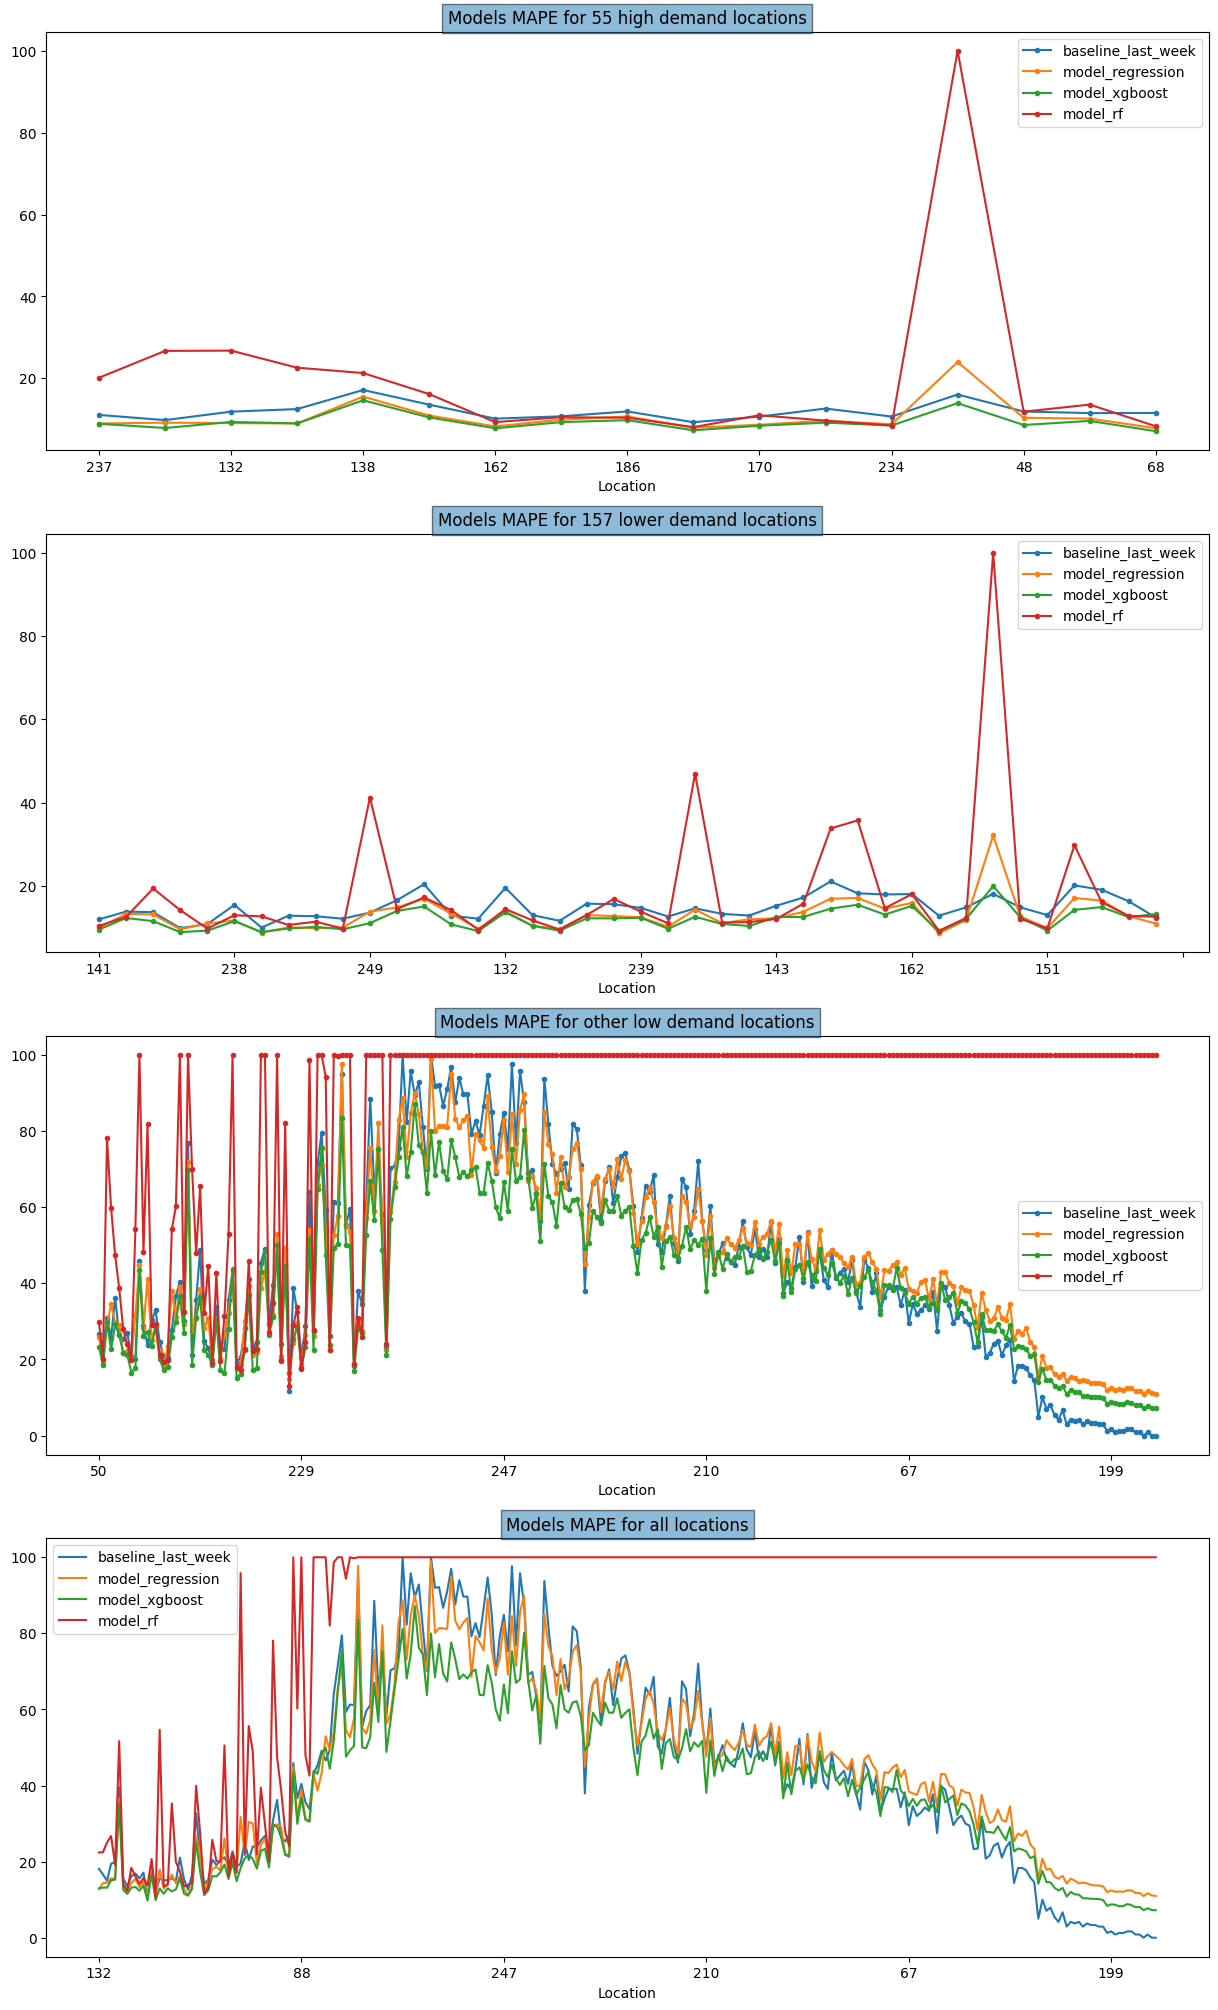

In [38]:
plot_mape(predictions_mean_error_dict, 'Location')

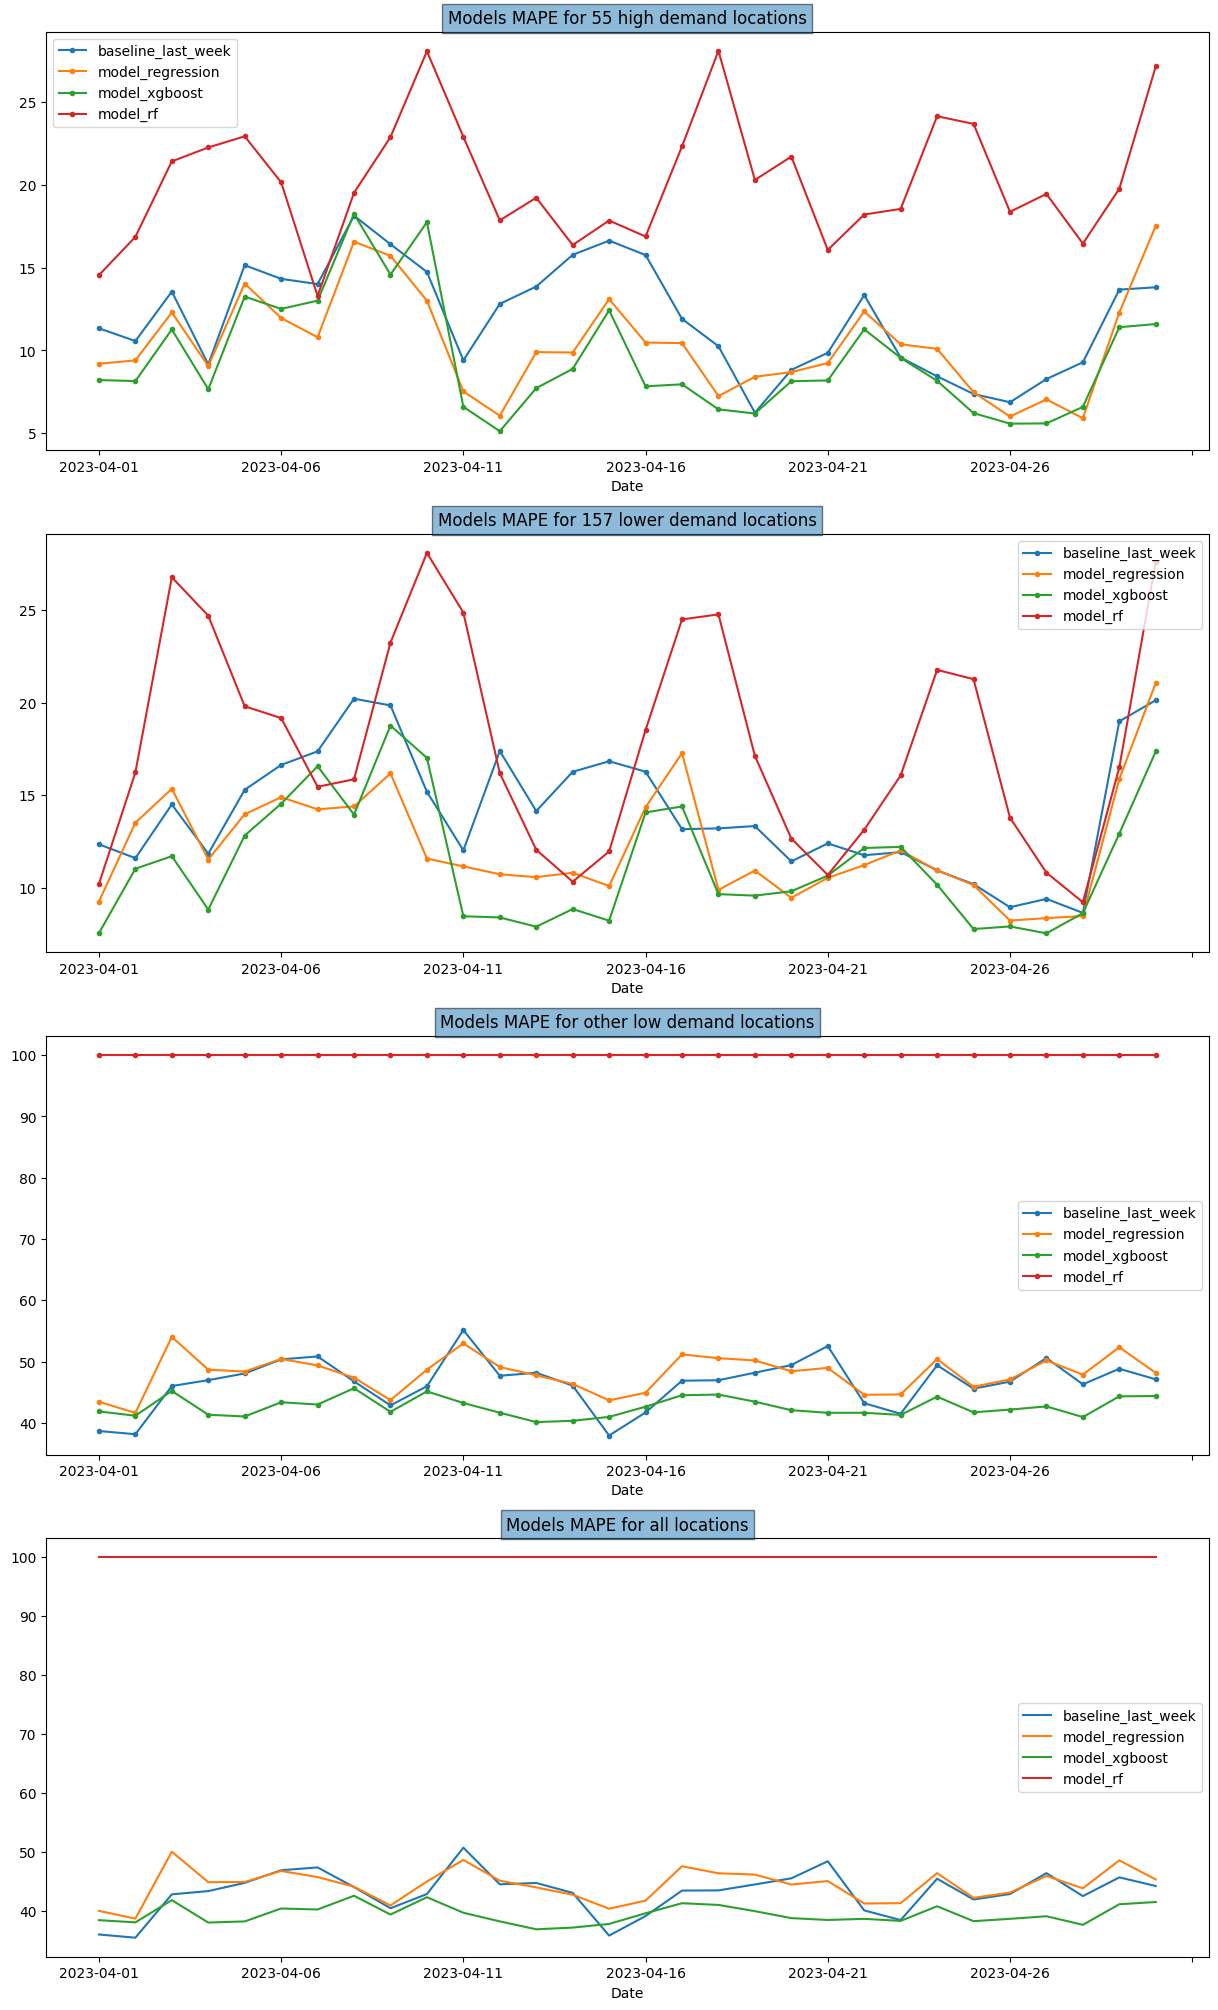

In [39]:
plot_mape(predictions_mean_error_dict, 'Date')

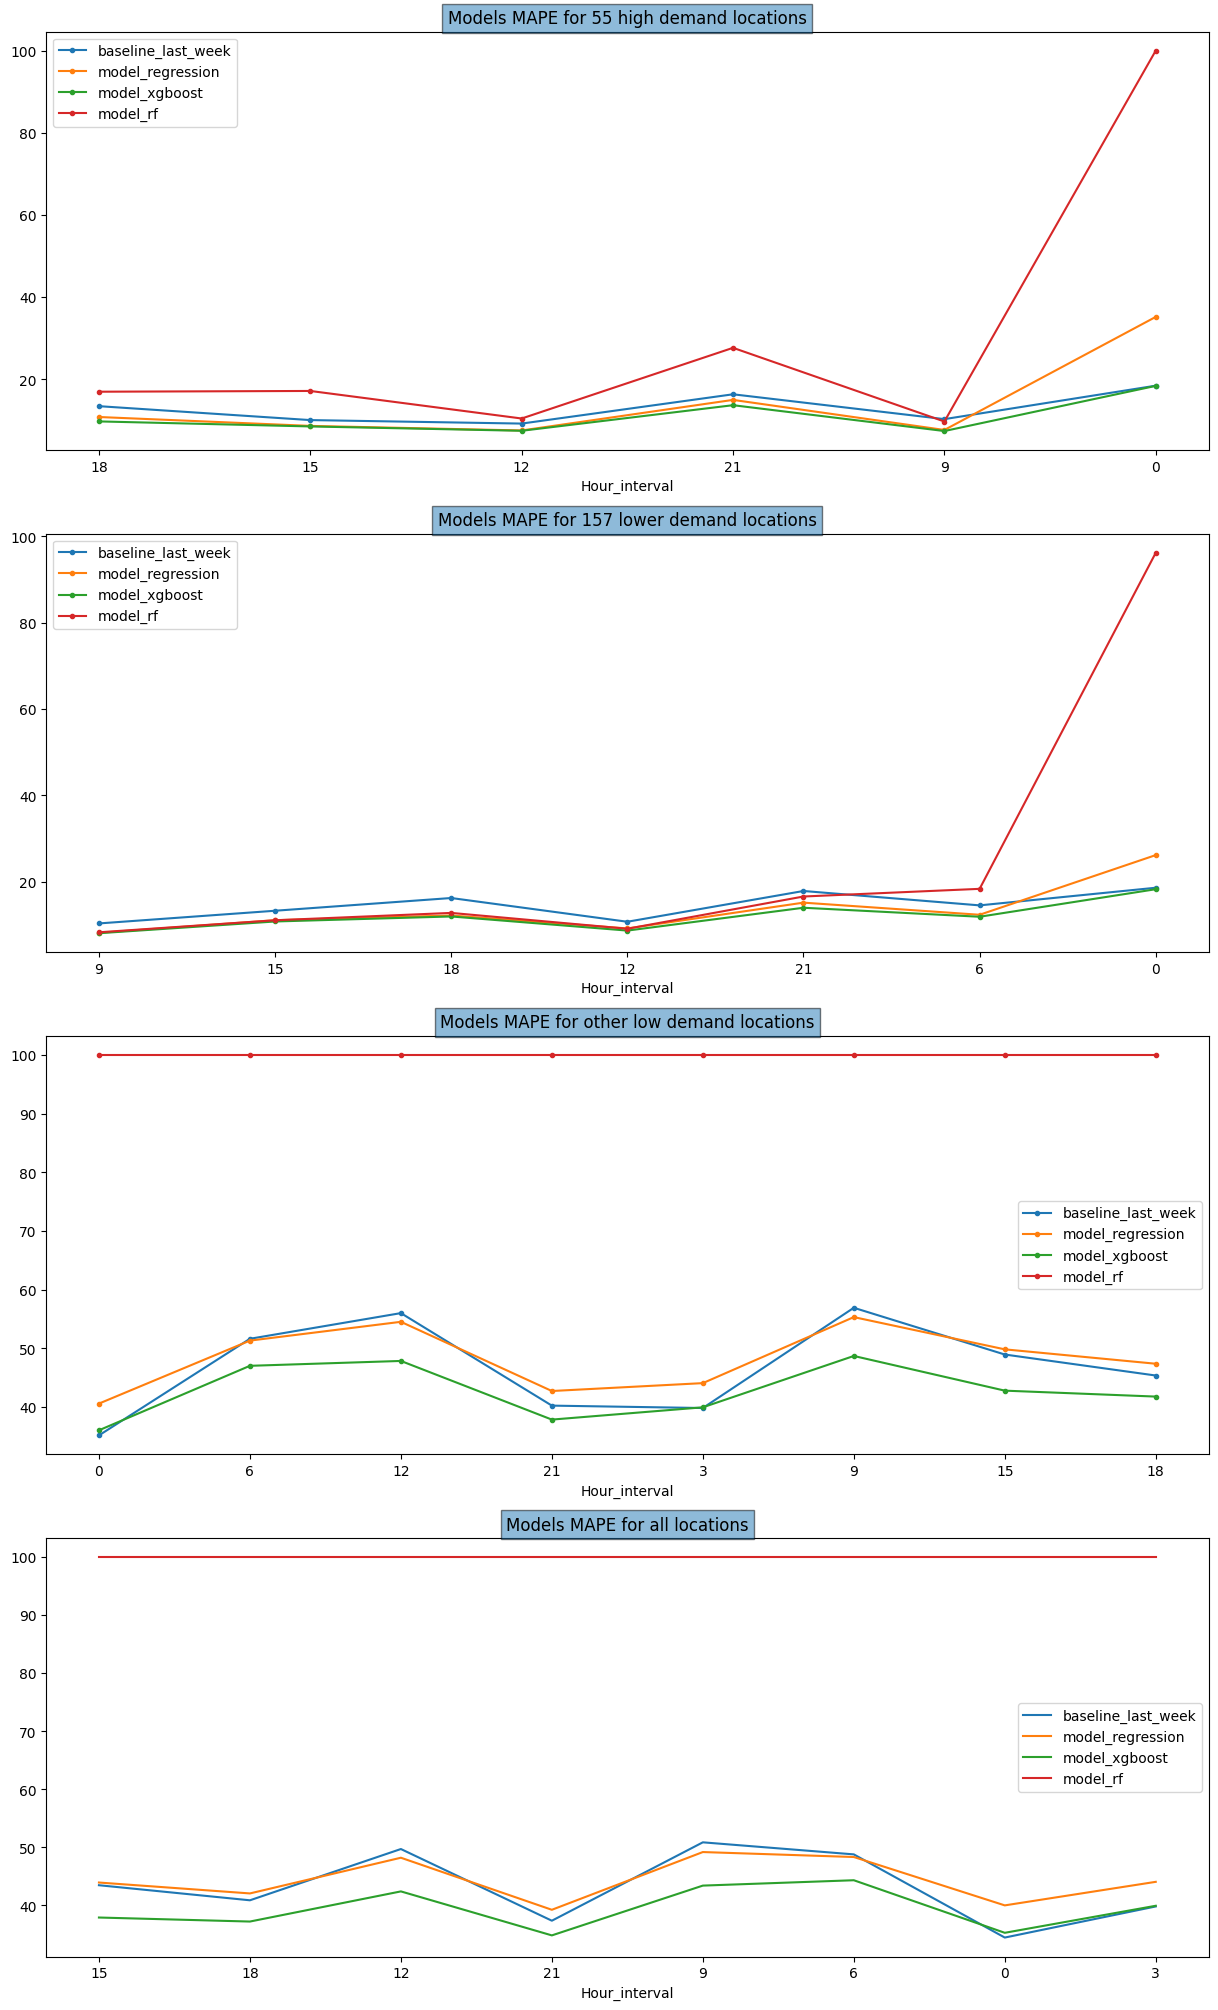

In [40]:
plot_mape(predictions_mean_error_dict, 'Hour_interval')

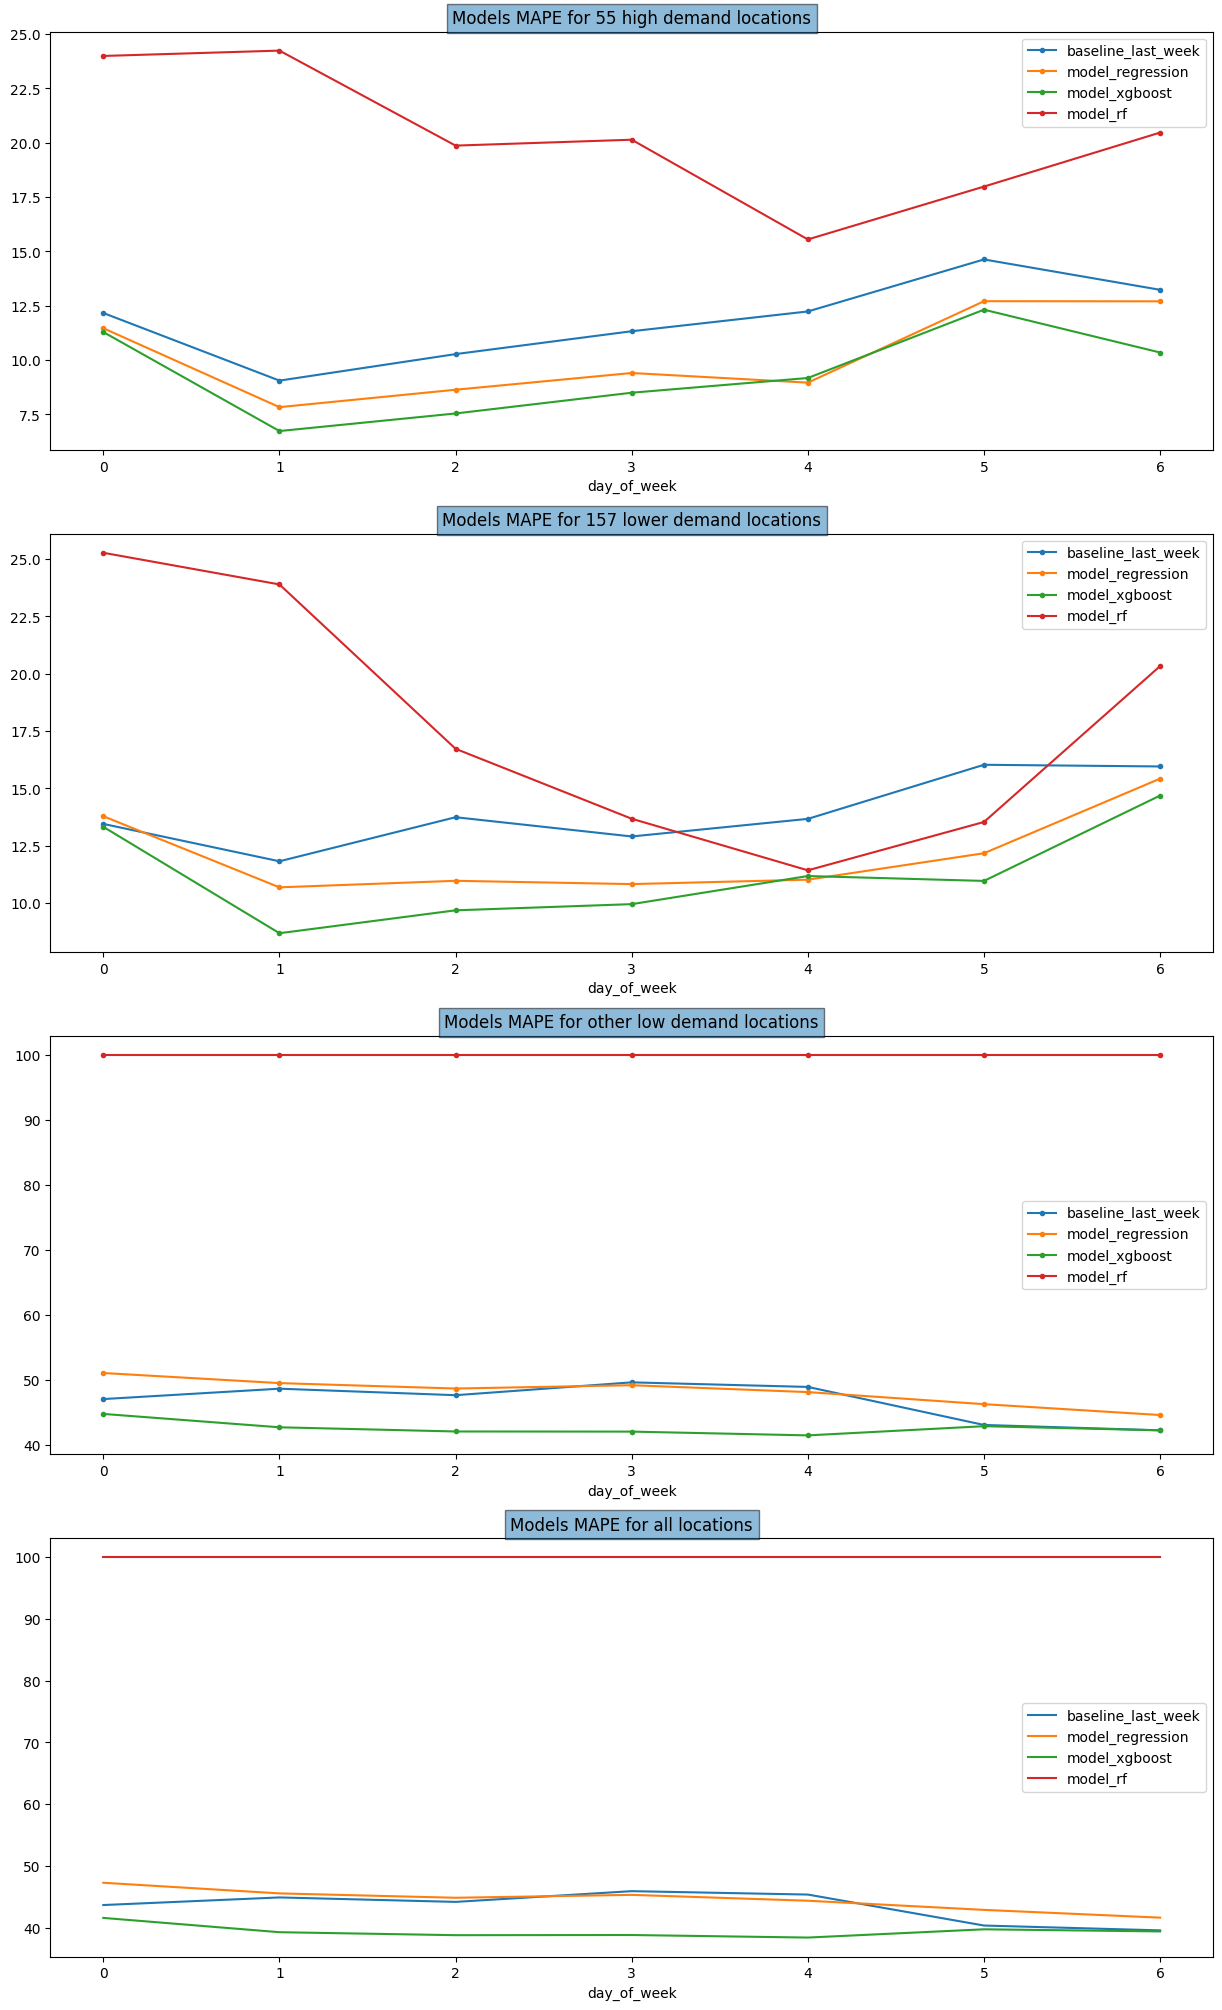

In [41]:
plot_mape(predictions_mean_error_dict, 'day_of_week')

### Plot MAE

In [42]:
def plot_mae(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):

            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mae',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAE for all locations', bbox=dict(alpha=0.5))

    # plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    # plt.savefig(plot_name, format='svg', dpi=1200)  


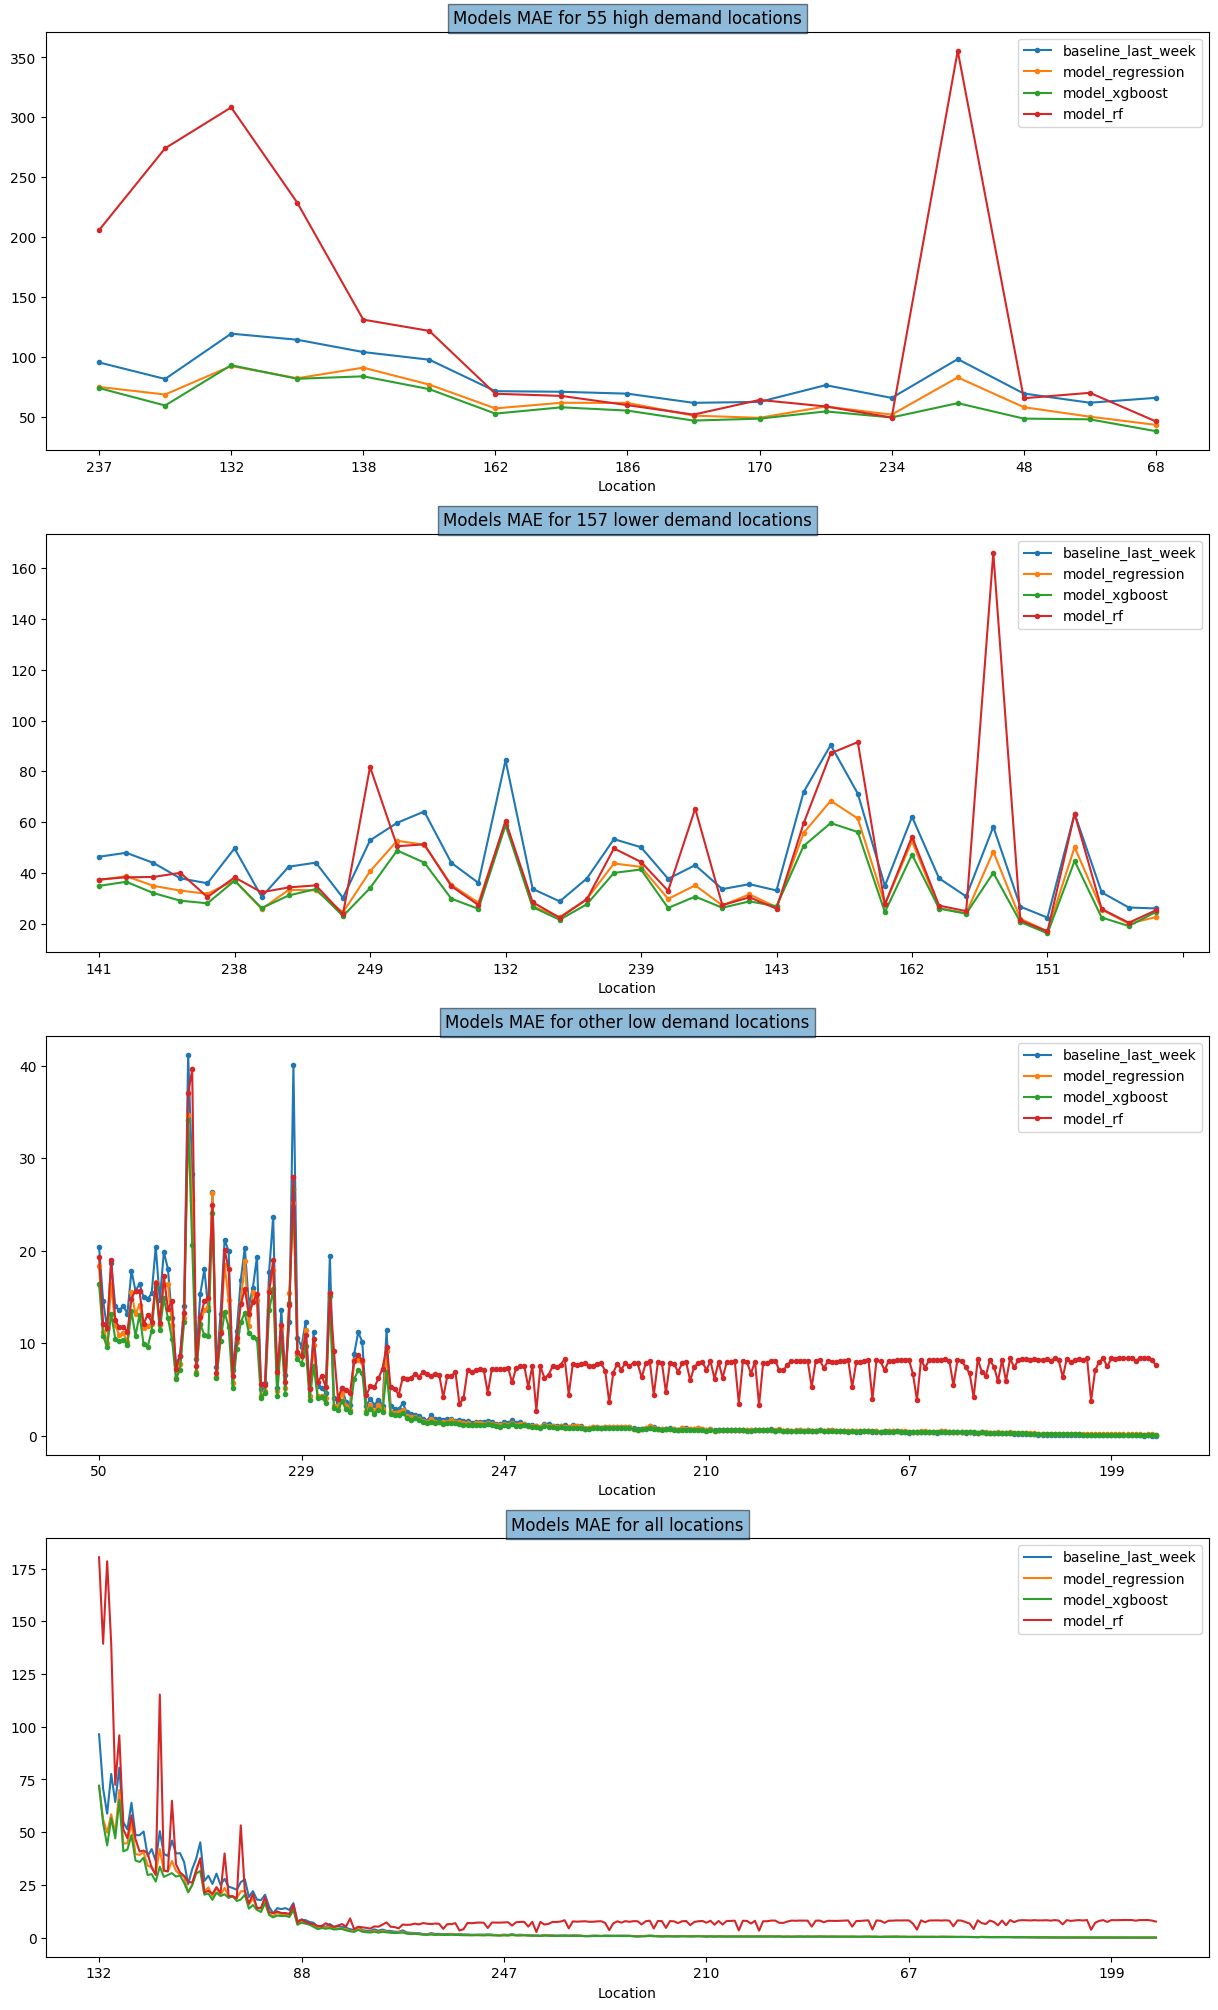

In [43]:
plot_mae(predictions_mean_error_dict, 'Location')

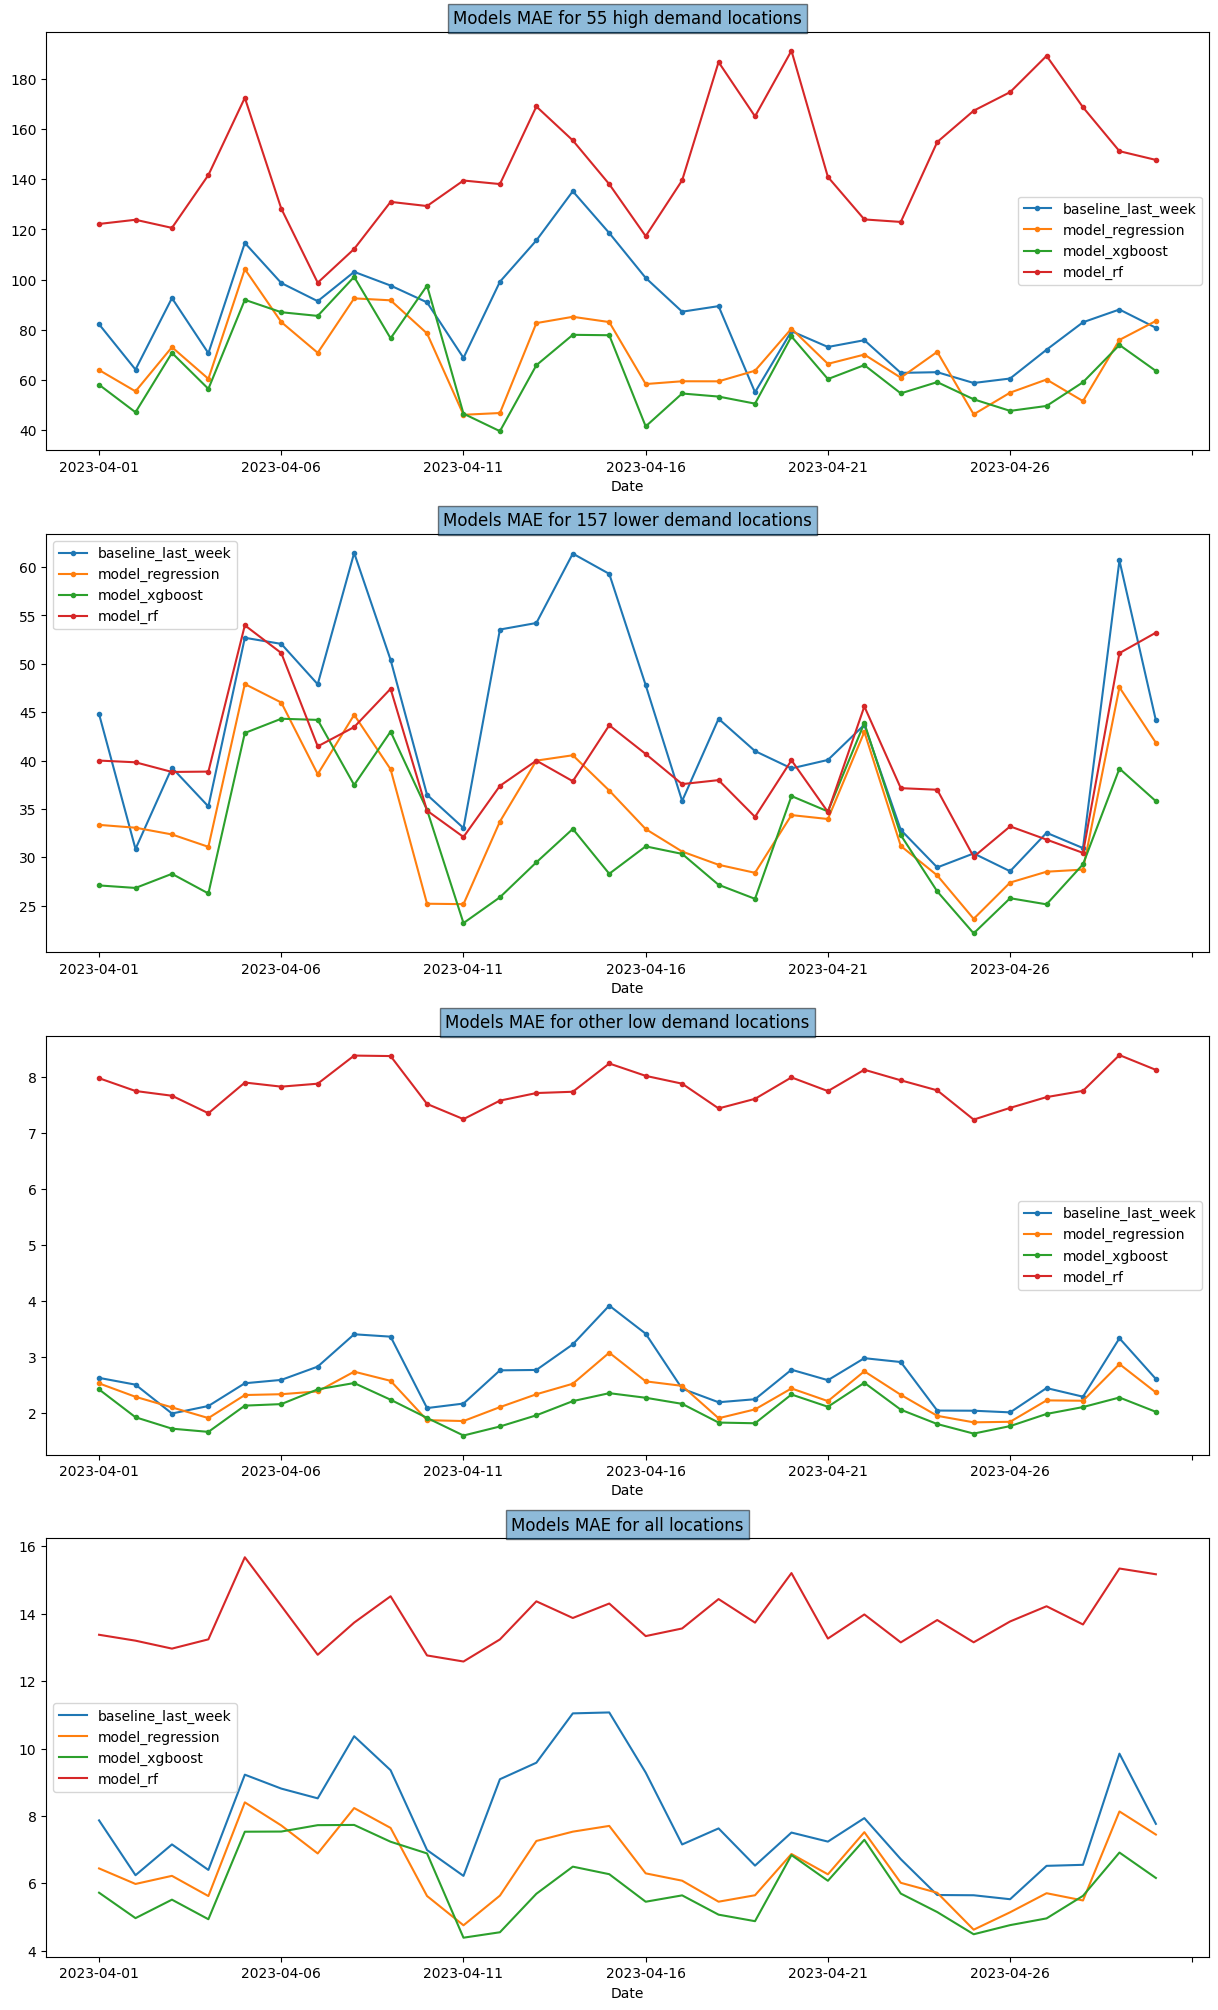

In [44]:
plot_mae(predictions_mean_error_dict, 'Date')

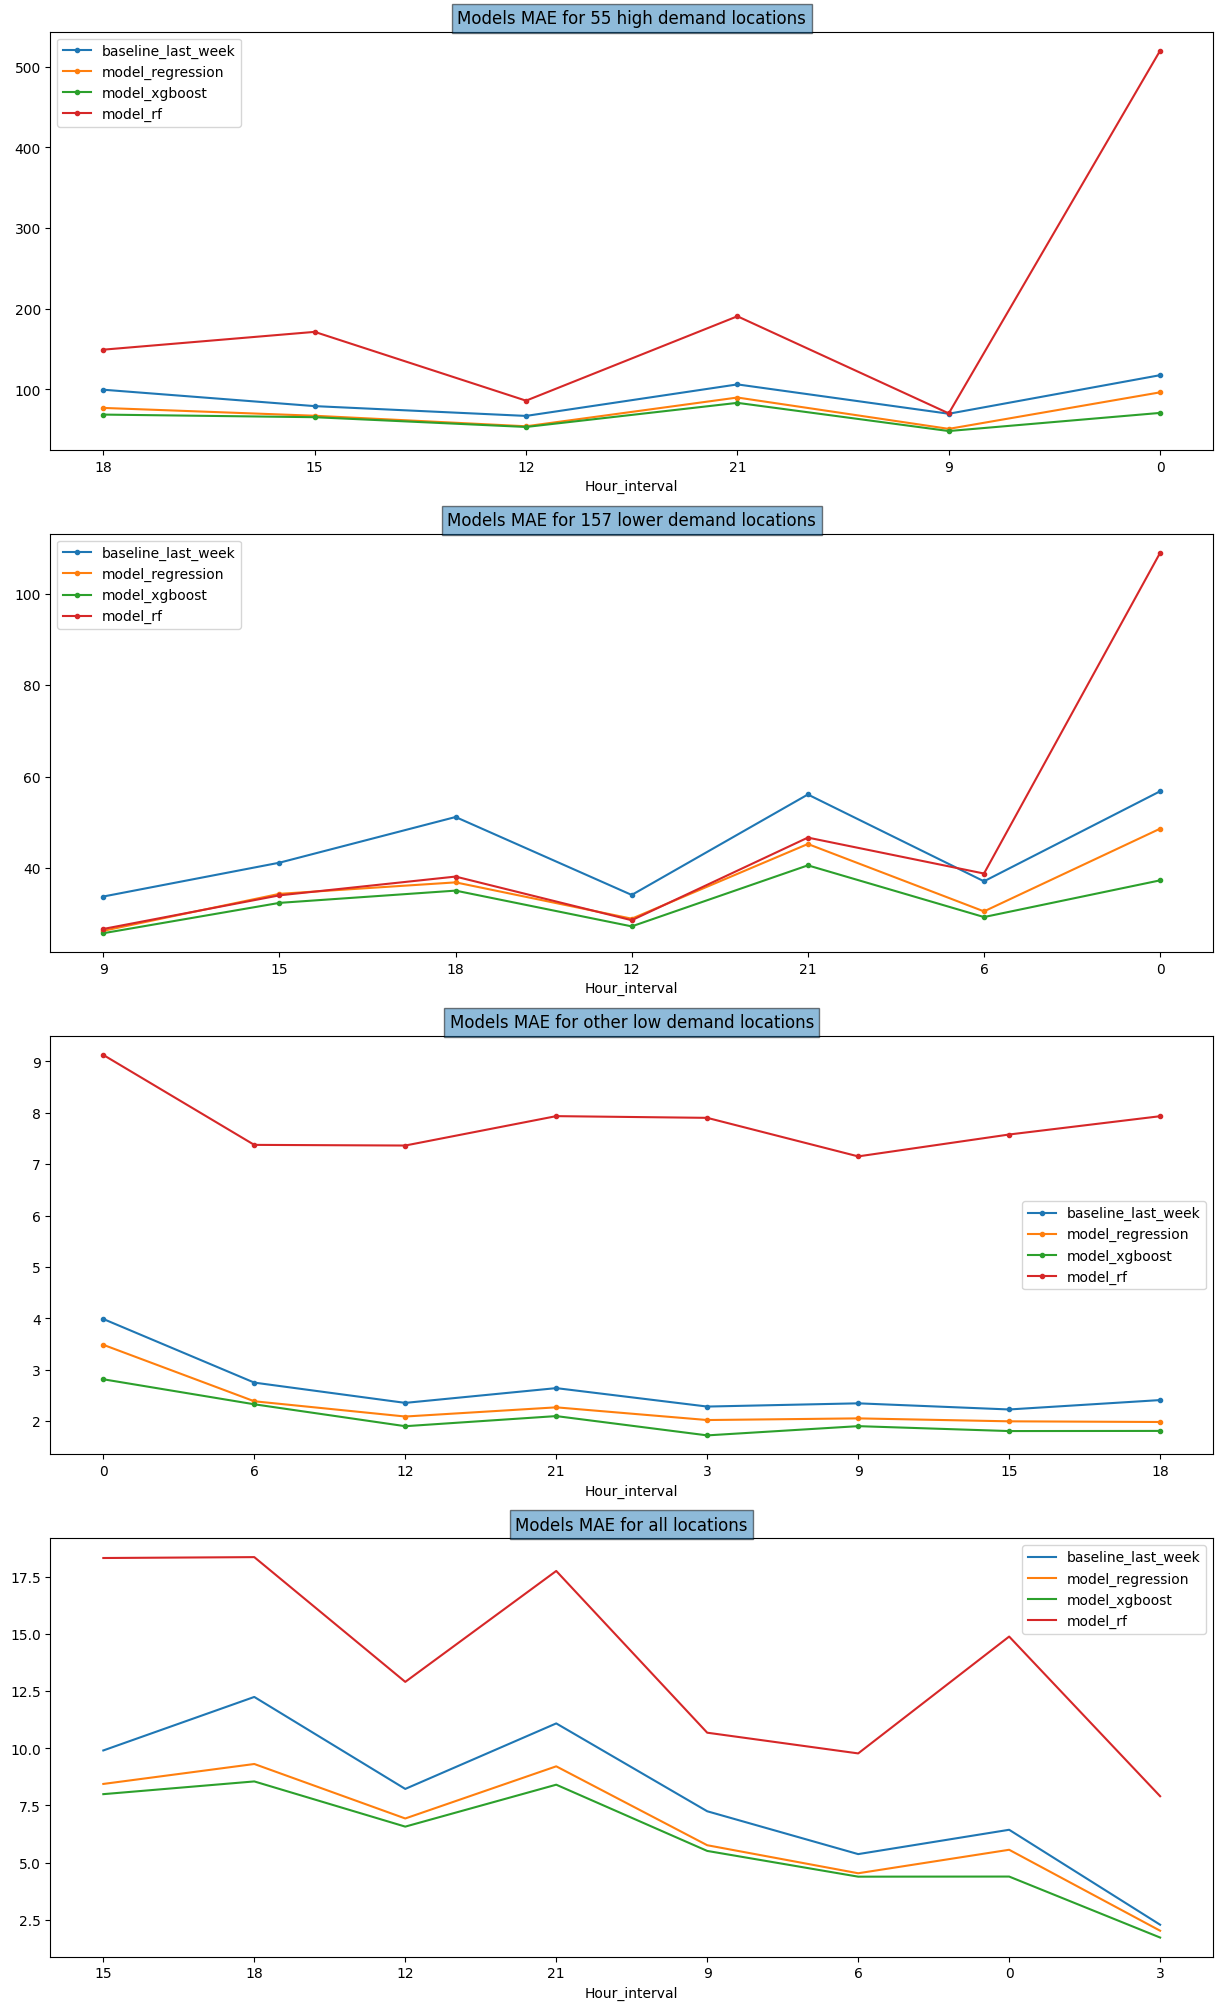

In [45]:
plot_mae(predictions_mean_error_dict, 'Hour_interval')

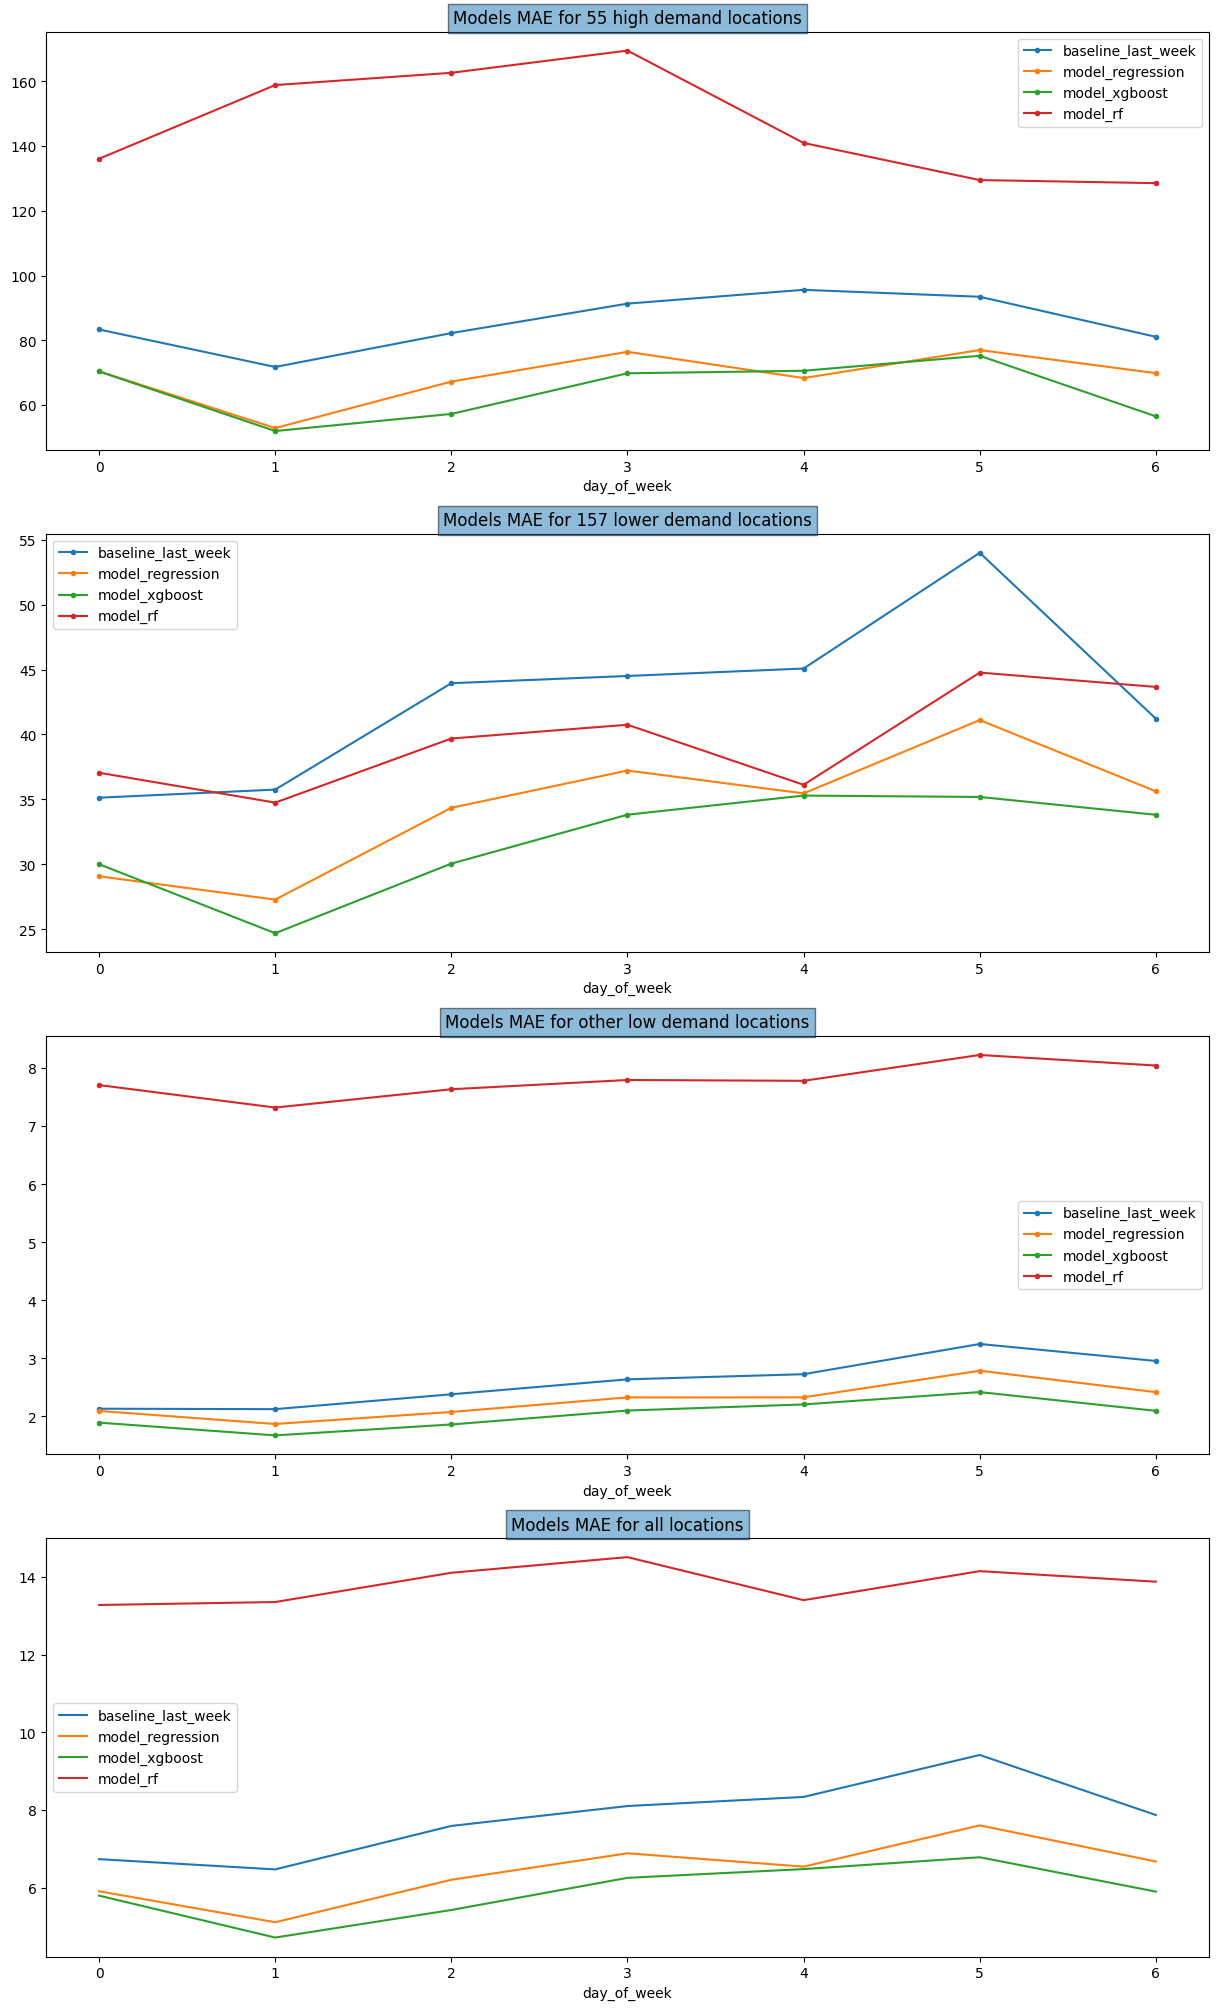

In [46]:
plot_mae(predictions_mean_error_dict, 'day_of_week')

### plot RMSE

In [47]:
def plot_rmse(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df['rmse'] = np.sqrt(high_demand_df['mse'])
            mid_demand_df['rmse'] = np.sqrt(mid_demand_df['mse'])
            low_demand_df['rmse'] = np.sqrt(low_demand_df['mse'])
            all_df['rmse'] = np.sqrt(all_df['mse'])

            high_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='rmse',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models RMSE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models RMSE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models RMSE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models RMSE for all locations', bbox=dict(alpha=0.5))

    # plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    # plt.savefig(plot_name, format='svg', dpi=1200)  


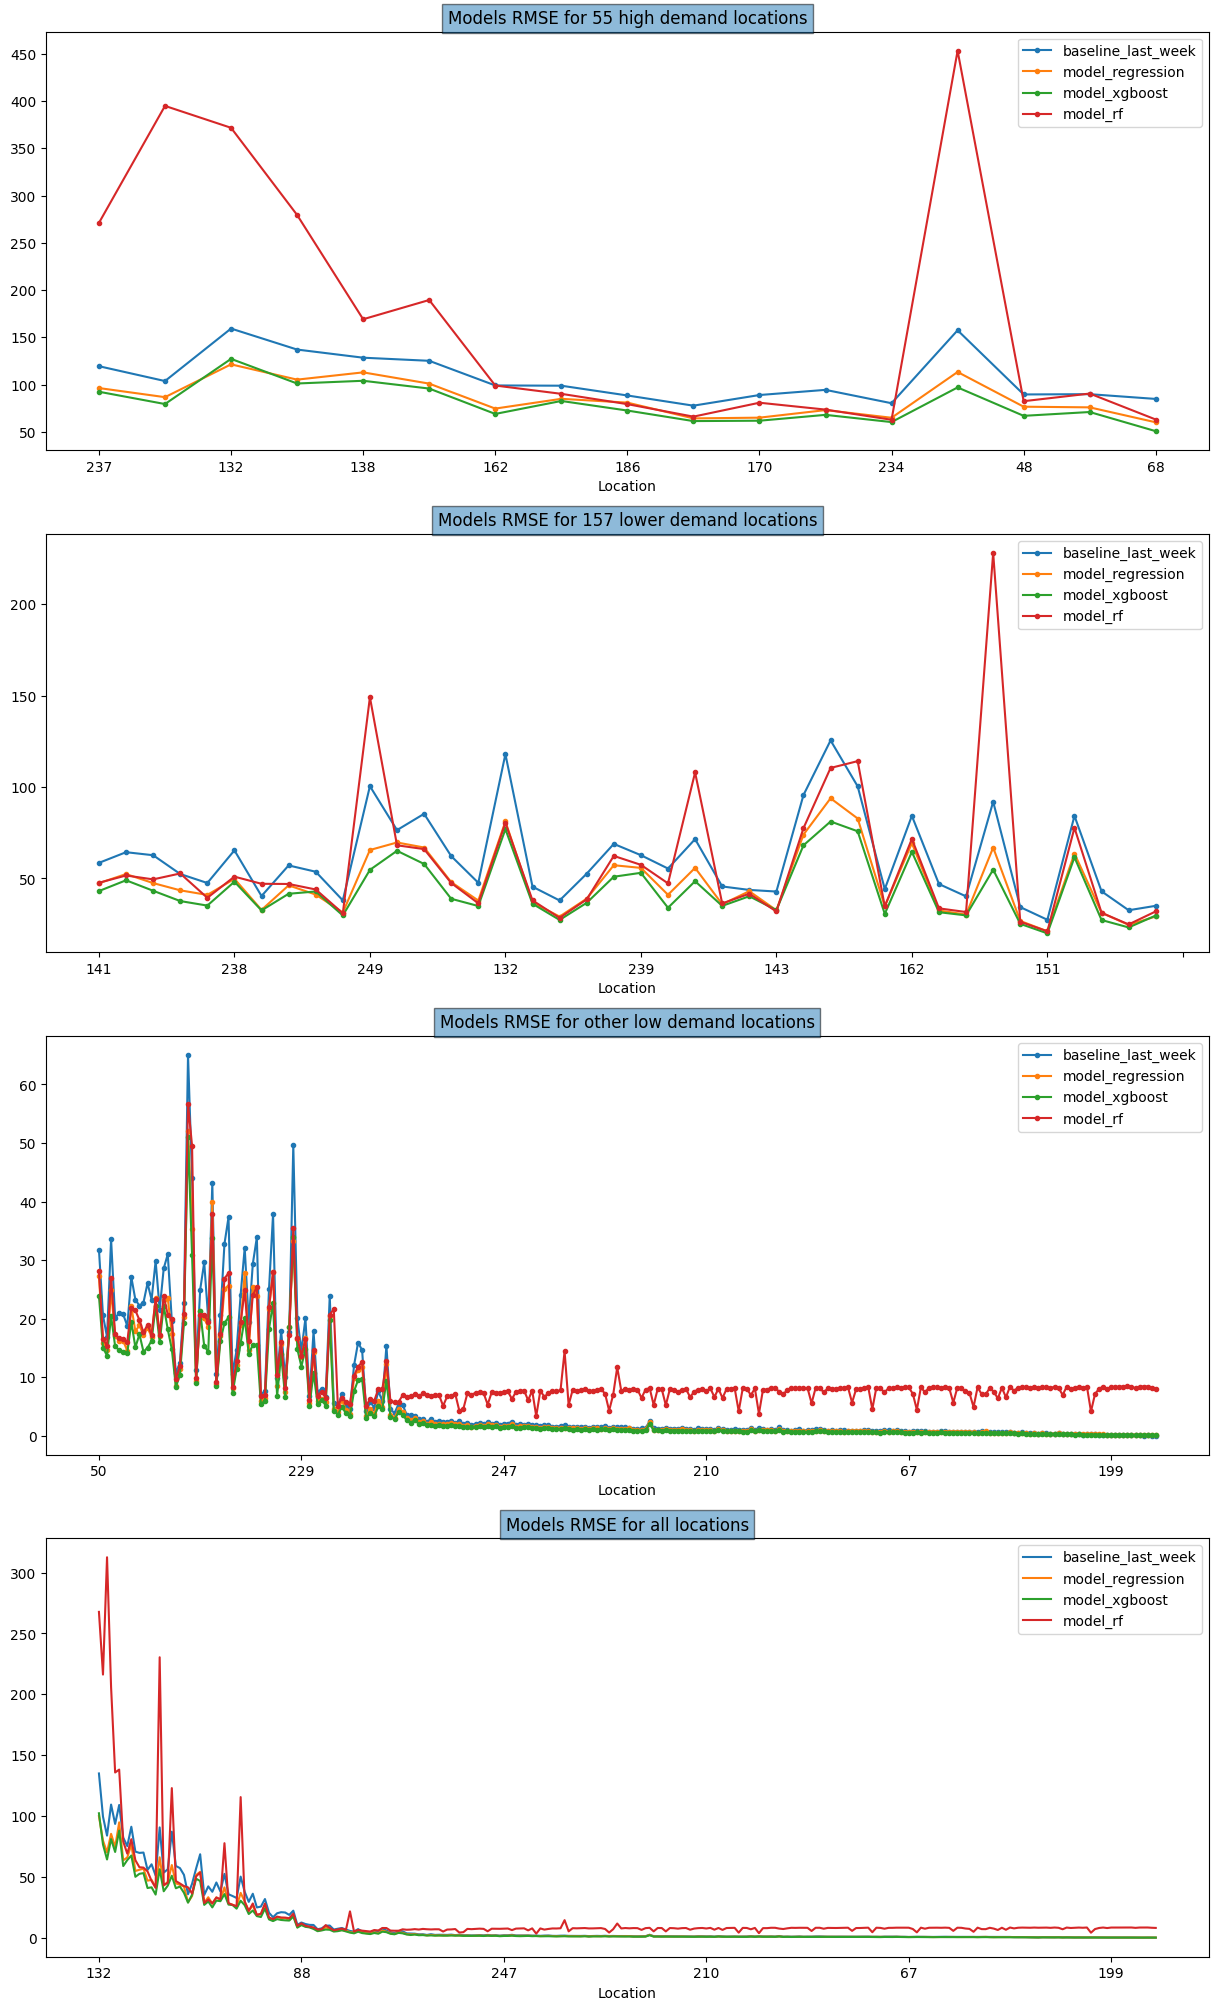

In [48]:
plot_rmse(predictions_mean_error_dict, 'Location')

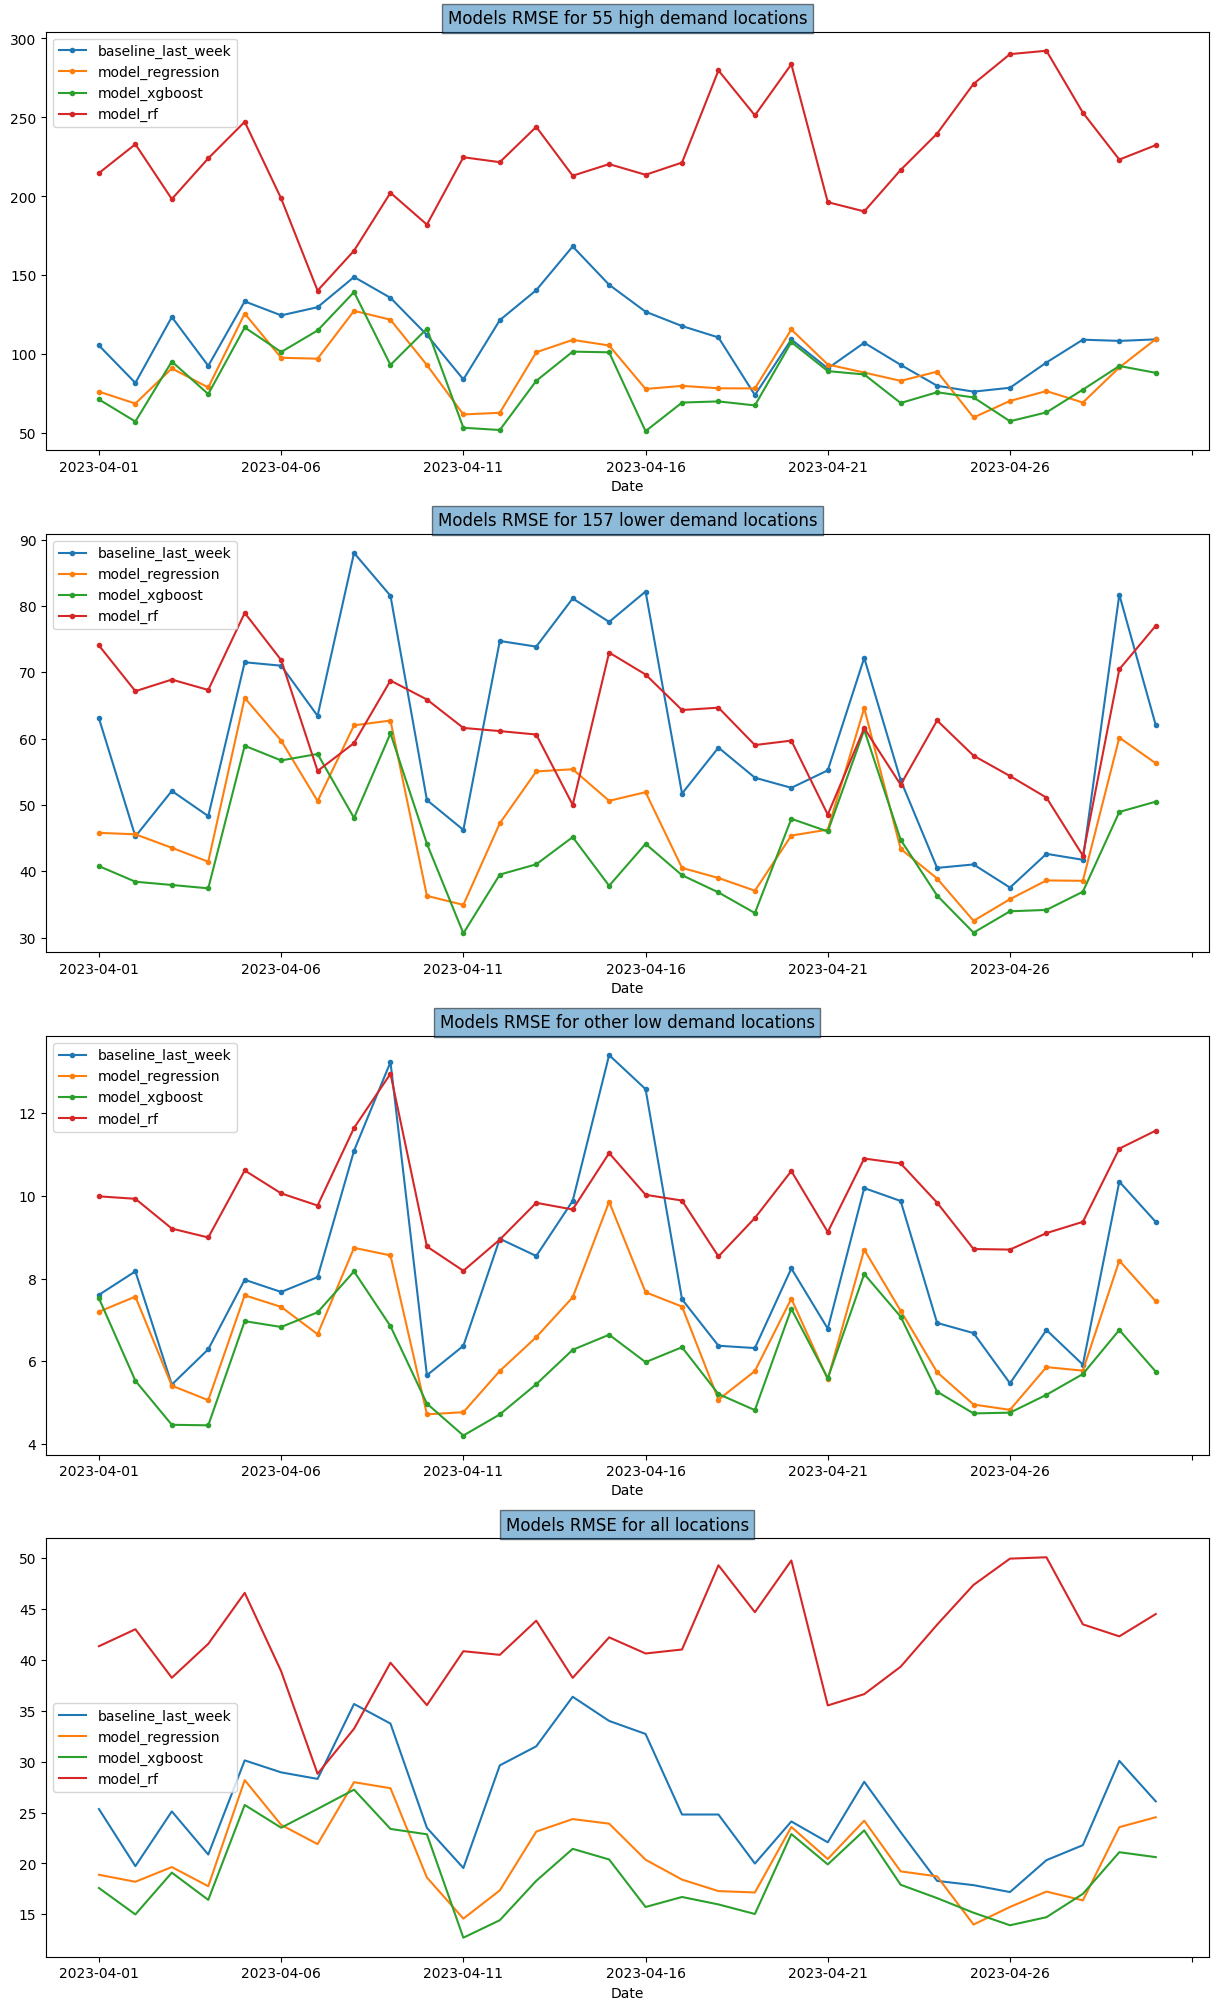

In [49]:
plot_rmse(predictions_mean_error_dict, 'Date')

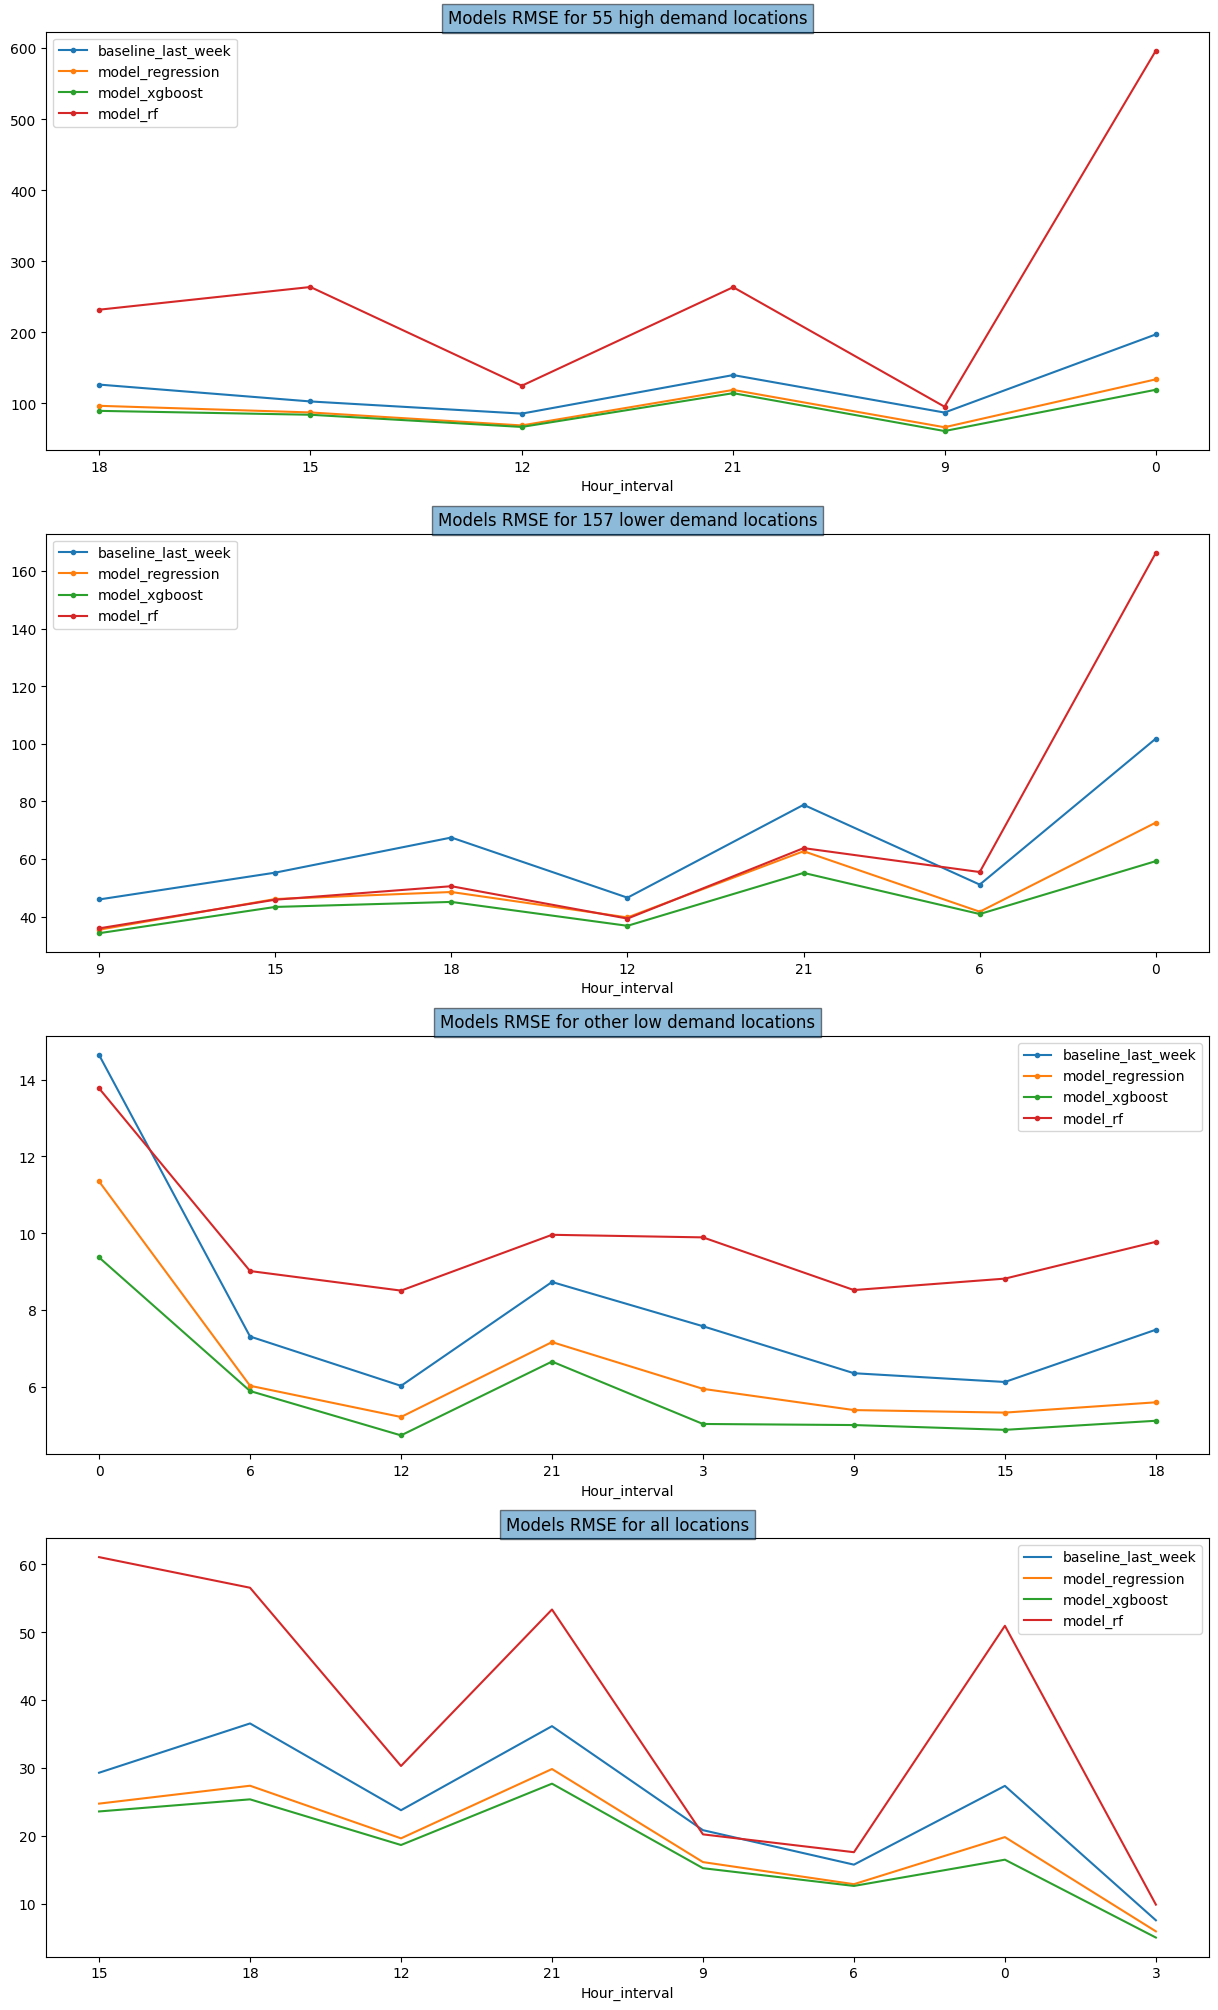

In [50]:
plot_rmse(predictions_mean_error_dict, 'Hour_interval')

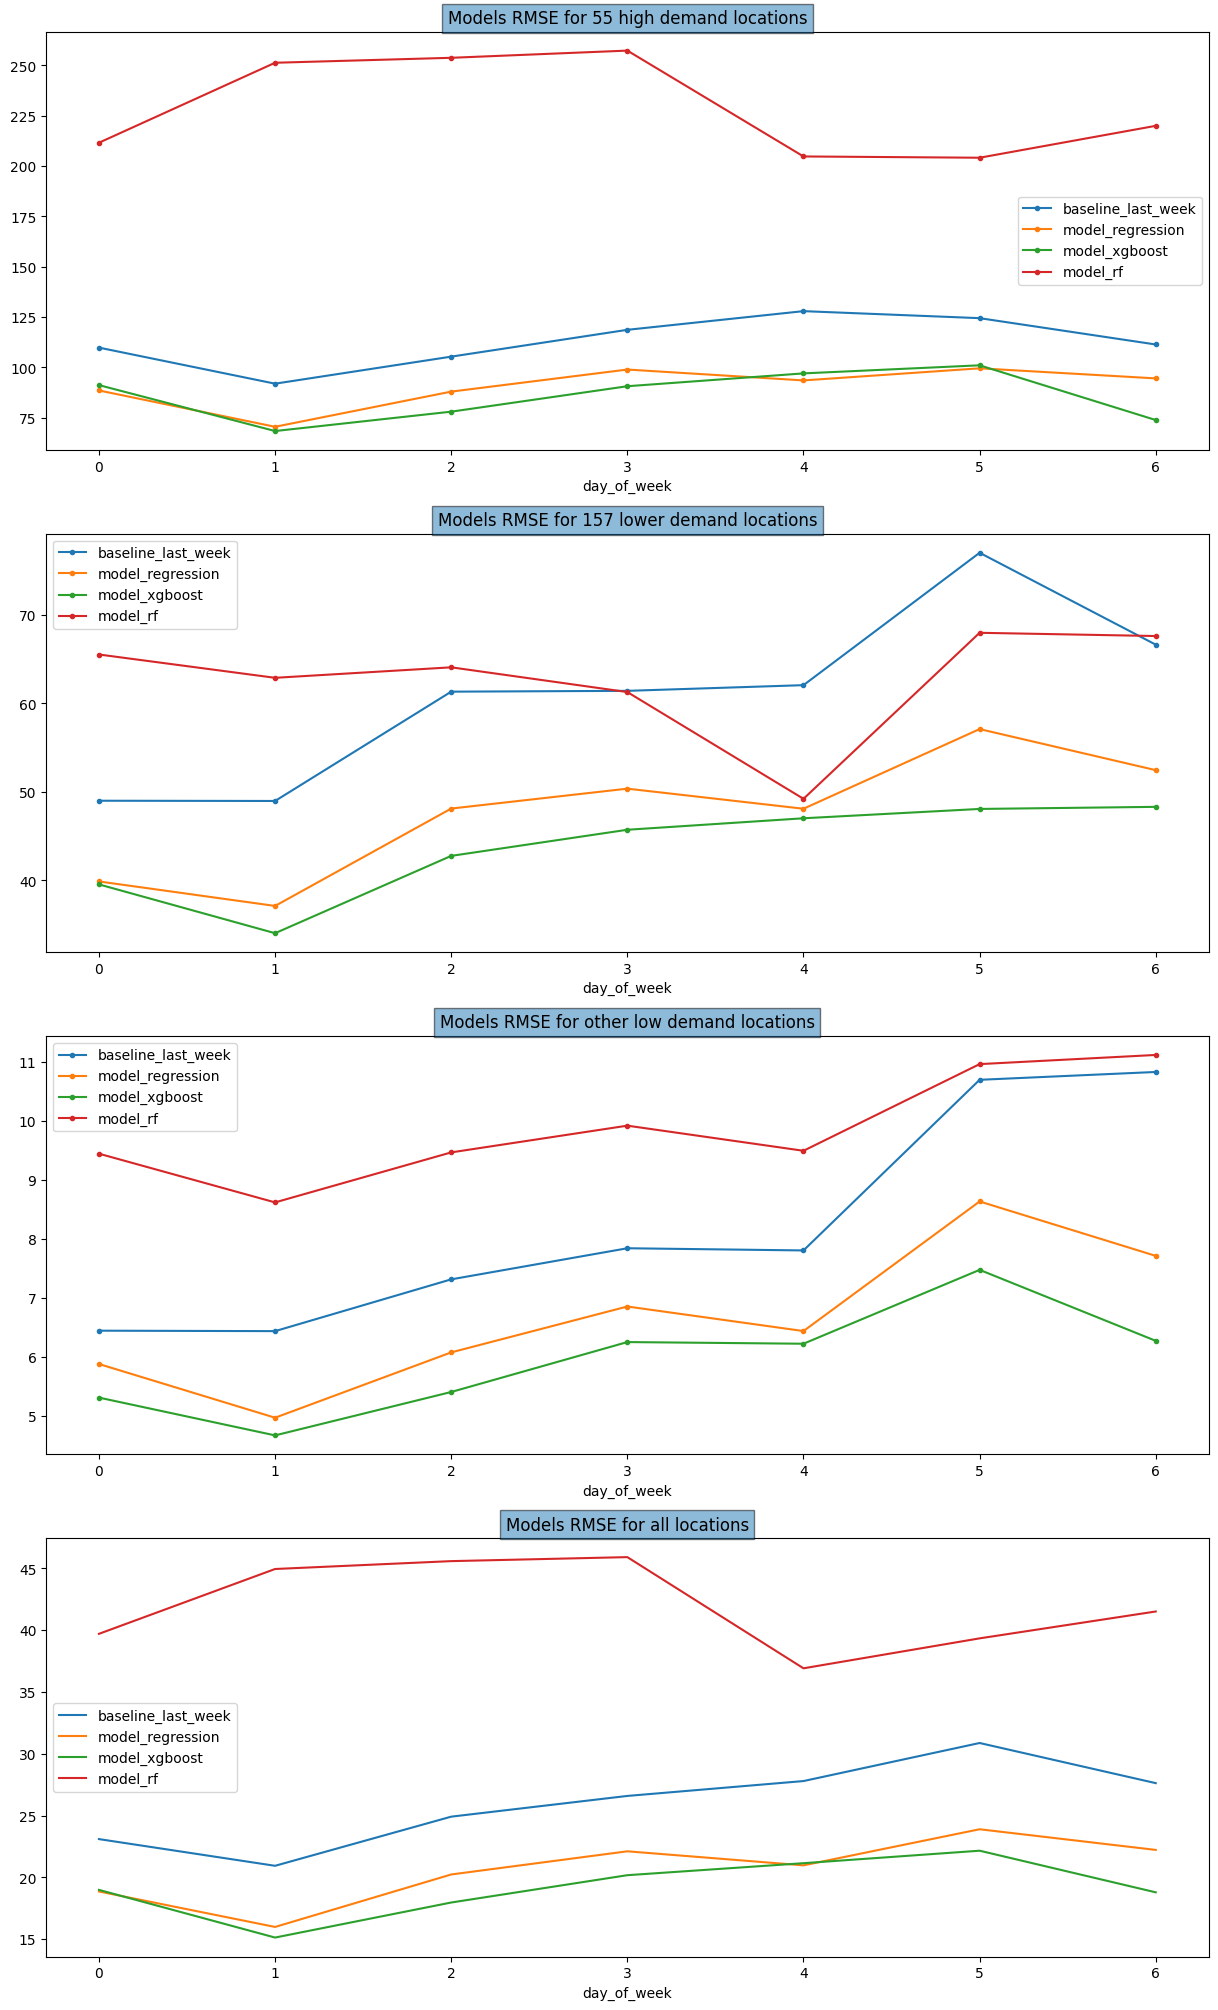

In [51]:
plot_rmse(predictions_mean_error_dict, 'day_of_week')

# Table of Results

In [52]:
def create_table_errors(predictions_dict, report_dict):
    for model, error_df in predictions_dict.items():
        if error_df is not None:
            report_dict['all_locations']['MAE'][model] = error_df['error'].mean()            
            report_dict['all_locations']['RMSE'][model] = np.sqrt(error_df['squared_error'].mean())
            report_dict['all_locations']['MAPE'][model] = error_df['percentage_error'].mean()

            sorted_index = sorted_locations_dict['sorted_index'][['Location', 'Hour_interval']]
            error_high_demand_df = error_df.merge(sorted_index[:HIGH_DEMAND_NUMS], on=['Location','Hour_interval'])
            error_mid_demand_df = error_df.merge(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS], on=['Location','Hour_interval'])
            error_low_demand_df = error_df.merge(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:], on=['Location','Hour_interval'])

            report_dict['high_demand_locations']['MAE'][model] = error_high_demand_df['error'].mean()            
            report_dict['high_demand_locations']['RMSE'][model] = np.sqrt(error_high_demand_df['squared_error'].mean())
            report_dict['high_demand_locations']['MAPE'][model] = error_high_demand_df['percentage_error'].mean()
            
            report_dict['mid_demand_locations']['MAE'][model] = error_mid_demand_df['error'].mean()            
            report_dict['mid_demand_locations']['RMSE'][model] = np.sqrt(error_mid_demand_df['squared_error'].mean())
            report_dict['mid_demand_locations']['MAPE'][model] = error_mid_demand_df['percentage_error'].mean()
            
            report_dict['low_demand_locations']['MAE'][model] = error_low_demand_df['error'].mean()            
            report_dict['low_demand_locations']['RMSE'][model] = np.sqrt(error_low_demand_df['squared_error'].mean())
            report_dict['low_demand_locations']['MAPE'][model] = error_low_demand_df['percentage_error'].mean()
    return report_dict

In [53]:
report_dict = create_table_errors(predictions_dict, report_dict)
report_df = pd.DataFrame.from_dict({(i,j): report_dict[i][j] 
                            for i in report_dict.keys() 
                            for j in report_dict[i].keys()},
                            orient='index')

report_df.index = pd.MultiIndex.from_tuples(report_df.index)
report_df = report_df.T

In [54]:
df = pd.DataFrame(report_df,
                  index=pd.Index(report_df.index),
                  columns=pd.MultiIndex.from_product([['high_demand_locations', 'mid_demand_locations', 'low_demand_locations', 'all_locations'],
                                                      ['MAPE','MAE','RMSE']], names=['location category:', 'Error Metrics:']))


In [55]:
df

location category: high_demand_locations                          \
Error Metrics:                      MAPE         MAE        RMSE   
baseline_last_week             11.981728   85.710909  113.647389   
model_regression               10.404525   69.240548   91.356191   
model_xgboost                   9.538285   64.682133   86.596625   
model_rf                       20.249124  145.448821  228.907117   

location category: mid_demand_locations                        \
Error Metrics:                     MAPE        MAE       RMSE   
baseline_last_week            14.074105  43.124841  62.325187   
model_regression              12.235348  34.577197  48.507365   
model_xgboost                 11.315641  32.020263  44.214080   
model_rf                      17.776561  39.855102  63.251523   

location category: low_demand_locations                     all_locations  \
Error Metrics:                     MAPE       MAE      RMSE          MAPE   
baseline_last_week            46.503791  2.635881  8.547627     43.168784   
model_regression              48.050287  2.295135  6.849440     44.379742   
model_xgboost                 42.628846  2.051965  6.064516     39.415032   
model_rf                     554.537652  7.811945  9.970746    500.311812   

location category:                        
Error Metrics:            MAE       RMSE  
baseline_last_week   7.848616  26.373248  
model_regression     6.469888  20.914566  
model_xgboost        5.940172  19.397546  
model_rf            13.823779  41.999941

In [56]:
df.style.format('{:.2f}')